<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Часть-1.-Работа-с-данными" data-toc-modified-id="Часть-1.-Работа-с-данными-1">Часть 1. Работа с данными</a></span></li><li><span><a href="#Часть-2" data-toc-modified-id="Часть-2-2">Часть 2</a></span></li></ul></div>

# Тестовое задание Junior Data Analyst

Задание выполнено Коноплевой Елизаветой Андреевной. Почта: kon.el.anat@gmail.com

## Часть 1. Работа с данными

Входные данные для тестового задания: https://docs.google.com/spreadsheets/d/165sp-lWd1L4qWxggw25DJo_njOCvzdUjAd414NSE8co/edit#gid=1439079331

Задача - подготовить и обработать исходные данных так, чтобы их можно было использовать во второй части задания.

В данных должны остаться следующие колонки:
* `area` - область,
* `cluster` - номер кластера,
* `cluster_name` - название кластера,
* `keyword` - словосочетание,
* `count` - показатель,
* `x` и `y` - координаты для диаграммы рассеяния,
* `color` - цвет точки на карте для данного словосочетания

Загрузим данные

In [1]:
#подгружаем библиотеки
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('Тестовое задание.xlsx')
display(df.head())
df.info()

,area,cluster,cluster_name,keyword,good (1),count,x,y
0,eligibility,0.0,Кластер 0,several animated buried,1.0,1260.0,5.772342,12.564796257345005
1,eligibility,0.0,Кластер 0,singles unusual buyers,1.0,866.0,14.829280,7.8507285727125815
2,eligibility,0.0,Кластер 0,hawaiian directive,1.0,163.0,11.381856,3.8981370219558604
3,eligibility,0.0,Кластер 0,dynamics directly,1.0,1146.0,9.980149,6.281427914064545
4,eligibility,1.0,Кластер 1,decision surgeons montreal,1.0,823.0,3.283940,4.39674063521296


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area          228 non-null    object 
 1   cluster       228 non-null    float64
 2   cluster_name  228 non-null    object 
 3   keyword       228 non-null    object 
 4   good (1)      227 non-null    float64
 5   count         227 non-null    object 
 6   x             228 non-null    float64
 7   y             228 non-null    object 
dtypes: float64(3), object(5)
memory usage: 14.4+ KB


In [3]:
df['cluster'].unique()

array([ 0.,  1.,  2.,  3., nan])

Необходимо
* [x] столбец `good (1)` удалить
* [x] проверить строки на пропуски
* [x] привести данные к нужным типам (`cluster`, `count`, `y`)
* [x] проверить строки на дубликаты

In [4]:
#удаляем столбец good (1)
df = df.drop('good (1)', axis=1)

In [5]:
#считаем количество пропусков
df.isna().sum()

area            1
cluster         1
cluster_name    1
keyword         1
count           2
x               1
y               1
dtype: int64

Всего 8 пропусков. Удаление такого малого количества пропусков не скажется на статистике данных

In [6]:
#удаляем пропуски и восстанавливаем индексы
df = df.dropna().reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area          227 non-null    object 
 1   cluster       227 non-null    float64
 2   cluster_name  227 non-null    object 
 3   keyword       227 non-null    object 
 4   count         227 non-null    object 
 5   x             227 non-null    float64
 6   y             227 non-null    object 
dtypes: float64(2), object(5)
memory usage: 12.5+ KB


In [7]:
#изучим, какие уникальные значения есть в столбце cluster
df['cluster'].unique()

array([0., 1., 2., 3.])

In [8]:
#приводим к целочисленному типу
df['cluster'] = df['cluster'].astype('int64')

In [9]:
#попробуем привести count сначала к вещественному типу и посчитаем, сколько будет незаполненных значений
pd.to_numeric(df['count'], errors='coerce').isna().sum()

2

2 значения не удалось привести к вещественному типу. Удалим их и после этого приведем столбец к целочисленному типу

In [10]:
#заменяем тип данных на вещественный. при ошибке присваивается NaN
df['count'] = pd.to_numeric(df['count'], errors='coerce')
#удаляем пропуски
df = df.dropna(subset=['count'])
#приводим к целочисленному типу
df['count'] = df['count'].astype('int64')

In [11]:
#приводим столбец y к вещественному типу

#по той же стратегии
pd.to_numeric(df['y'], errors='coerce').isna().sum()

1

Приведем к вещественному типу и удалим одно пропущенное значение 

In [12]:
#заменяем тип данных на вещественный. при ошибке присваивается NaN
df['y'] = pd.to_numeric(df['y'], errors='coerce')
#удаляем пропуски
df = df.dropna(subset=['y'])

In [13]:
#проверим на дубликаты
print('Дубликатов до удаления:', df.duplicated().sum())
df = df.drop_duplicates().reset_index(drop=True)
print('Дубликатов после удаления:', df.duplicated().sum())

Дубликатов до удаления: 0
Дубликатов после удаления: 0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area          224 non-null    object 
 1   cluster       224 non-null    int64  
 2   cluster_name  224 non-null    object 
 3   keyword       224 non-null    object 
 4   count         224 non-null    int64  
 5   x             224 non-null    float64
 6   y             224 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 12.4+ KB


В ходе предобработки было удалено всего 4 строки данных, что составляет менее двух процентов от общего числа. Это не повлияет на распределения в данных.

Далее необходимо добавить колонку `color`:

Цвет задается каждому словосочетанию согласно следующими правилам:
* внутри одной области цвета словосочетаний в одном кластере должны быть одинаковые, в разных - отличаться (например, у "Кластер 1" все слова будут окрашены в красный, у "Кластер 2" - в зеленый и т.д.)
* цвета кластеров в разных областях могут повторяться
* цвета кластеров в разных областях с разным номером не имеют никакой связи (у одной области [area] слова из "Кластер 1" могут быть красного цвета, в другой области у слов из "Кластер 1" может быть другой цвет)

Узнаем, сколько всего кластеров есть в датафрейме

In [15]:
df['cluster_name'].unique()

array(['Кластер 0', 'Кластер 1', 'Кластер 2', 'Кластер 3'], dtype=object)

Всего 4 кластера. Узнаем количество кластеров в каждой области

In [16]:
df.groupby('area')['cluster'].agg('nunique')

area
ar\vr          4
available      4
capability     4
dialog         4
eligibility    4
except         4
greetings      4
housewives     4
lithuania      4
locator        4
personnel      4
protein        4
twisted        4
winner         4
worlds         4
Name: cluster, dtype: int64

В каждой области 4 кластера. Далее в цикле произведем присваивание цветов кластерам Т.к. цвета кластеров от области к области могут повторяться, цикл будет универсальным

In [17]:
#сперва создадим нулевой столбец color
df['color'] = 0

In [65]:
#создаем список областей
areas = df['area'].unique()
#в цикле проходимся по каждой области и присваиваем цвет каждому кластеру
for area in areas:
    for i, color in enumerate(['tab:blue', 'tab:orange', 'tab:green', 'tab:red']):
        df.loc[(df['area'] == area) & (df['cluster'] == i), 'color'] = color

In [66]:
#выведем первые 15 строк датафрейма
df.head(15)

,area,cluster,cluster_name,keyword,count,x,y,color
0,ar\vr,0,Кластер 0,written conflict fabulous,1443,2.991167,7.106799,tab:blue
1,ar\vr,0,Кластер 0,reservations linking,751,10.195602,12.259496,tab:blue
2,ar\vr,0,Кластер 0,interfaces neutral,586,10.443533,13.809915,tab:blue
3,ar\vr,0,Кластер 0,committees parallel,173,6.735260,3.613983,tab:blue
4,ar\vr,1,Кластер 1,postcards looked republic detector,1397,10.474474,6.220012,tab:orange
5,ar\vr,1,Кластер 1,michael tobacco,1007,6.210880,12.721264,tab:orange
6,ar\vr,1,Кластер 1,filling volunteers academics,773,10.833920,8.652737,tab:orange
7,ar\vr,1,Кластер 1,celtic automation,715,12.197275,4.723751,tab:orange
8,ar\vr,2,Кластер 2,enquiries implementation,1249,3.580718,8.089951,tab:green
9,ar\vr,2,Кластер 2,previously standing languages commands,889,14.668089,8.467136,tab:green


Столбец `color` заполнили, переходим к следующей задаче. 

*Не должно быть дубликатов слов в одной и той же области (area), но словосочетание может повторяться из area в area*

In [67]:
for area in areas:
    df[df['area'] == area] = df[df['area'] == area].drop_duplicates(subset=['keyword'])
df = df.dropna().reset_index(drop=True)
#при удалении дубликатов слетел тип данных в cluster и count. поправим
df['cluster'] = df['cluster'].astype('int64')
df['count'] = df['count'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area          217 non-null    object 
 1   cluster       217 non-null    int64  
 2   cluster_name  217 non-null    object 
 3   keyword       217 non-null    object 
 4   count         217 non-null    int64  
 5   x             217 non-null    float64
 6   y             217 non-null    float64
 7   color         217 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 13.7+ KB


Исключили дубликаты `keywords` внутри областей

*Сортировка должна происходить по колонкам area, cluster, cluster_name, count (по count значения сортируются в убывающем порядке, в остальных - по возрастающему)*

In [68]:
df = df.sort_values(by='count', ascending=False).sort_values(by=['area', 'cluster']).reset_index(drop=True)
df.head(20)

,area,cluster,cluster_name,keyword,count,x,y,color
0,ar\vr,0,Кластер 0,written conflict fabulous,1443,2.991167,7.106799,tab:blue
1,ar\vr,0,Кластер 0,reservations linking,751,10.195602,12.259496,tab:blue
2,ar\vr,0,Кластер 0,interfaces neutral,586,10.443533,13.809915,tab:blue
3,ar\vr,0,Кластер 0,committees parallel,173,6.735260,3.613983,tab:blue
4,ar\vr,1,Кластер 1,postcards looked republic detector,1397,10.474474,6.220012,tab:orange
5,ar\vr,1,Кластер 1,michael tobacco,1007,6.210880,12.721264,tab:orange
6,ar\vr,1,Кластер 1,filling volunteers academics,773,10.833920,8.652737,tab:orange
7,ar\vr,1,Кластер 1,celtic automation,715,12.197275,4.723751,tab:orange
8,ar\vr,2,Кластер 2,enquiries implementation,1249,3.580718,8.089951,tab:green
9,ar\vr,2,Кластер 2,previously standing languages commands,889,14.668089,8.467136,tab:green


Сохраняем полученный датафрейм в формате xlsx

In [69]:
df.to_excel('test_part_1.xlsx')

Файл можно найти по ссылке: https://docs.google.com/spreadsheets/d/13gupbelCDsdJTZBjlTSOVLtSK1NalPbRoouikpgsKfo/edit?usp=sharing

## Часть 2

На основании обработанных данных постройте по одной диаграмме рассеяния для каждой области (area)

Требования к визуализации:
* Наличие Footer-подписи на изображении
* Наличие легенды цветов и кластеров
* Перенос слишком длинных словосочетаний (например, слова длиннее 15 символов, можно разбить на "solar\n cell")
* Минимизация наложения (слепливания) подписей к друг на друга (постарайтесь сделать так, чтобы наложение было минимальным)
* Обводка точек.

Формат представления выходных данных: png-файлы размером не менее 1500х1500 пикселей с визуализациями  для каждой области (area).

In [70]:
colors = list(df['color'].unique())

In [71]:
import matplotlib.patches as mpatches

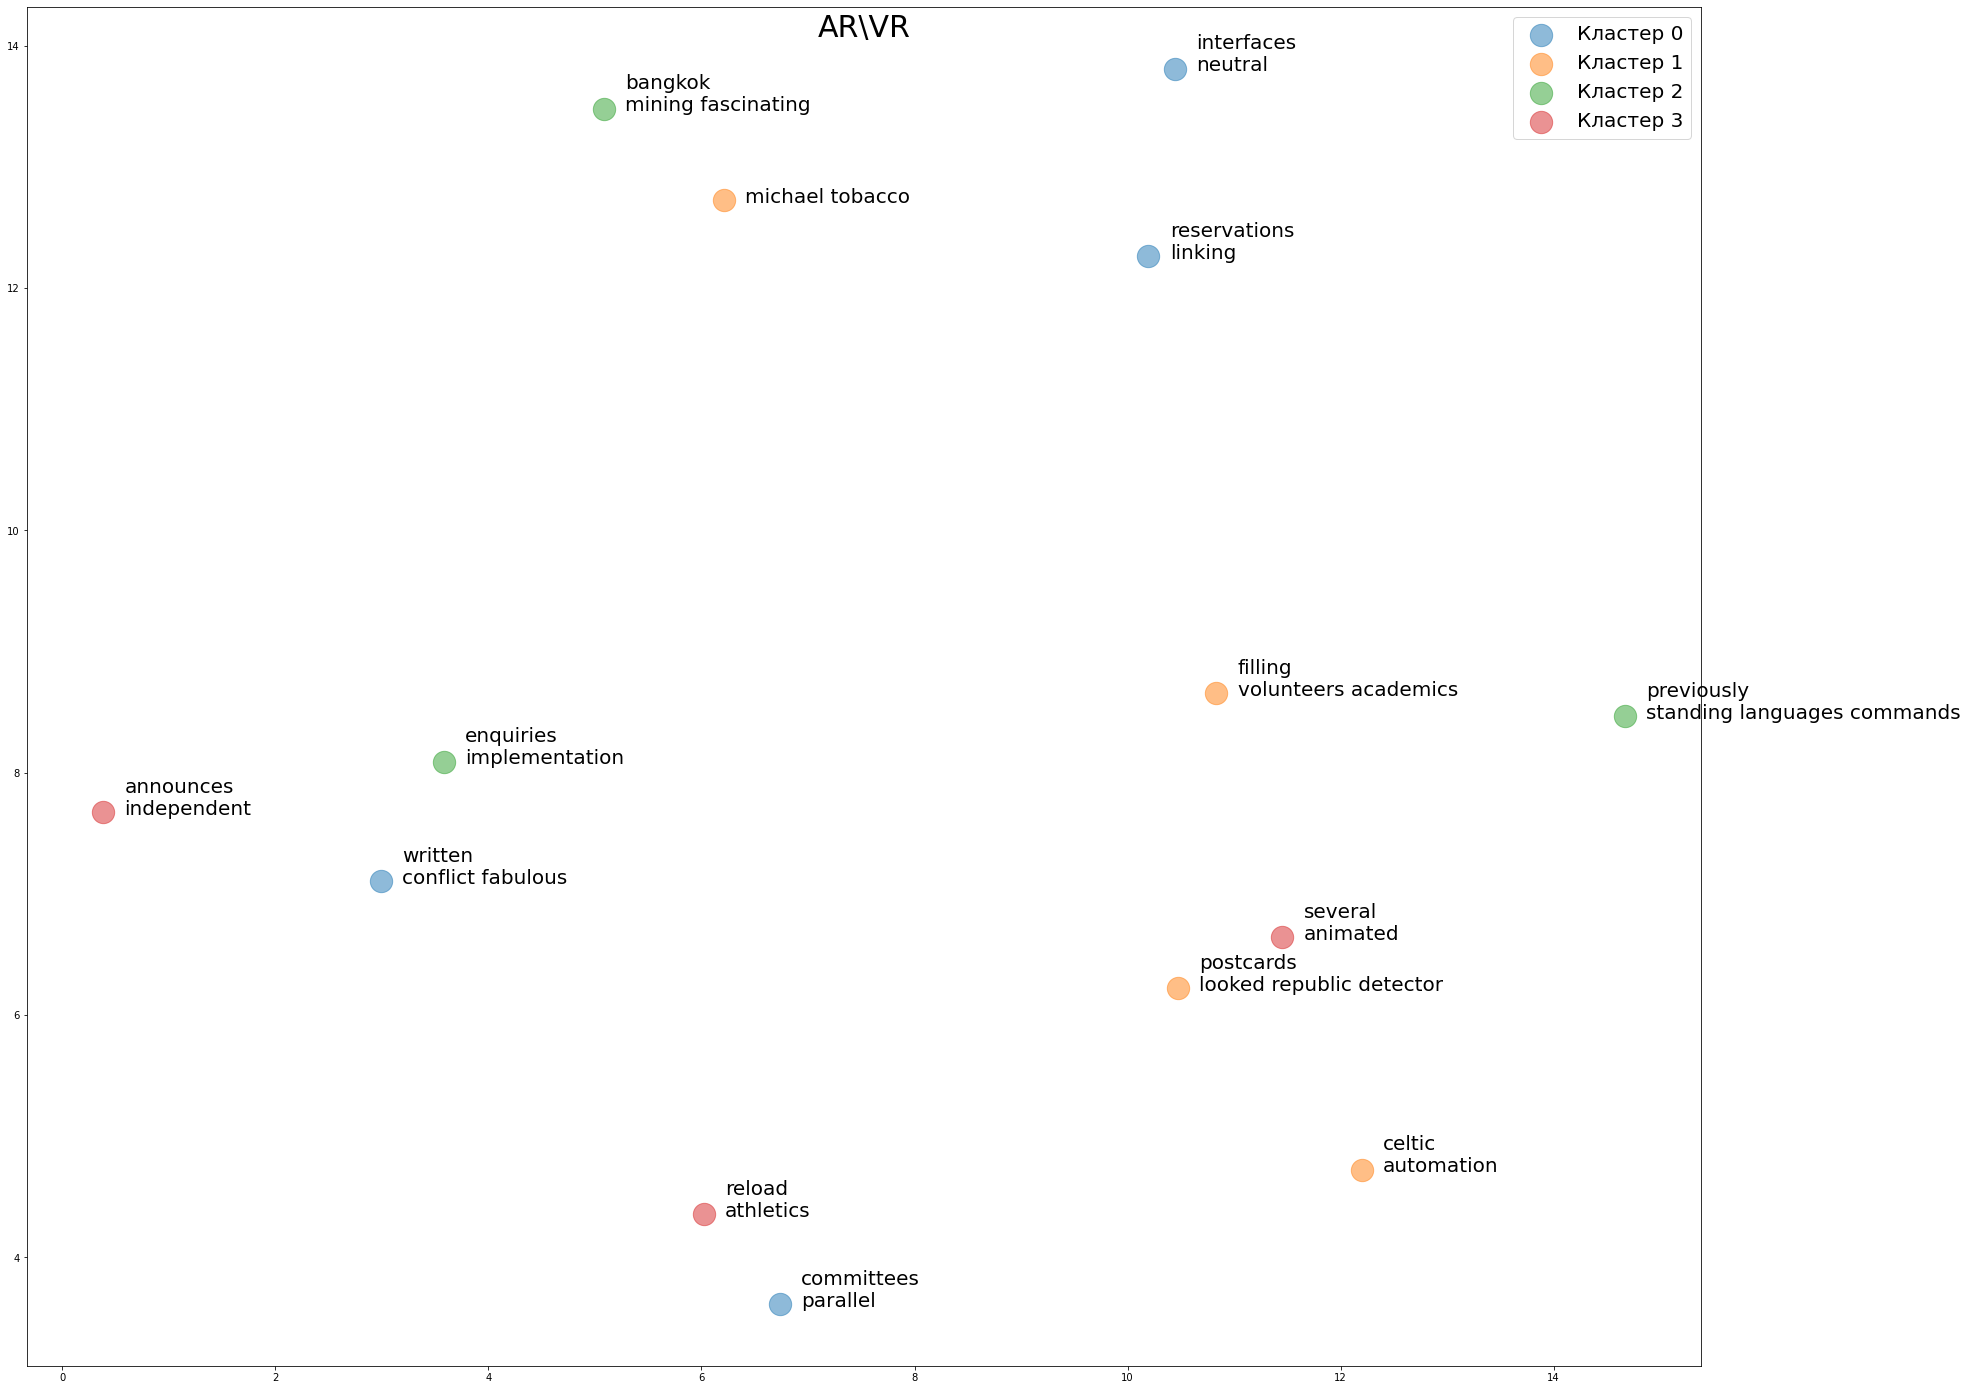

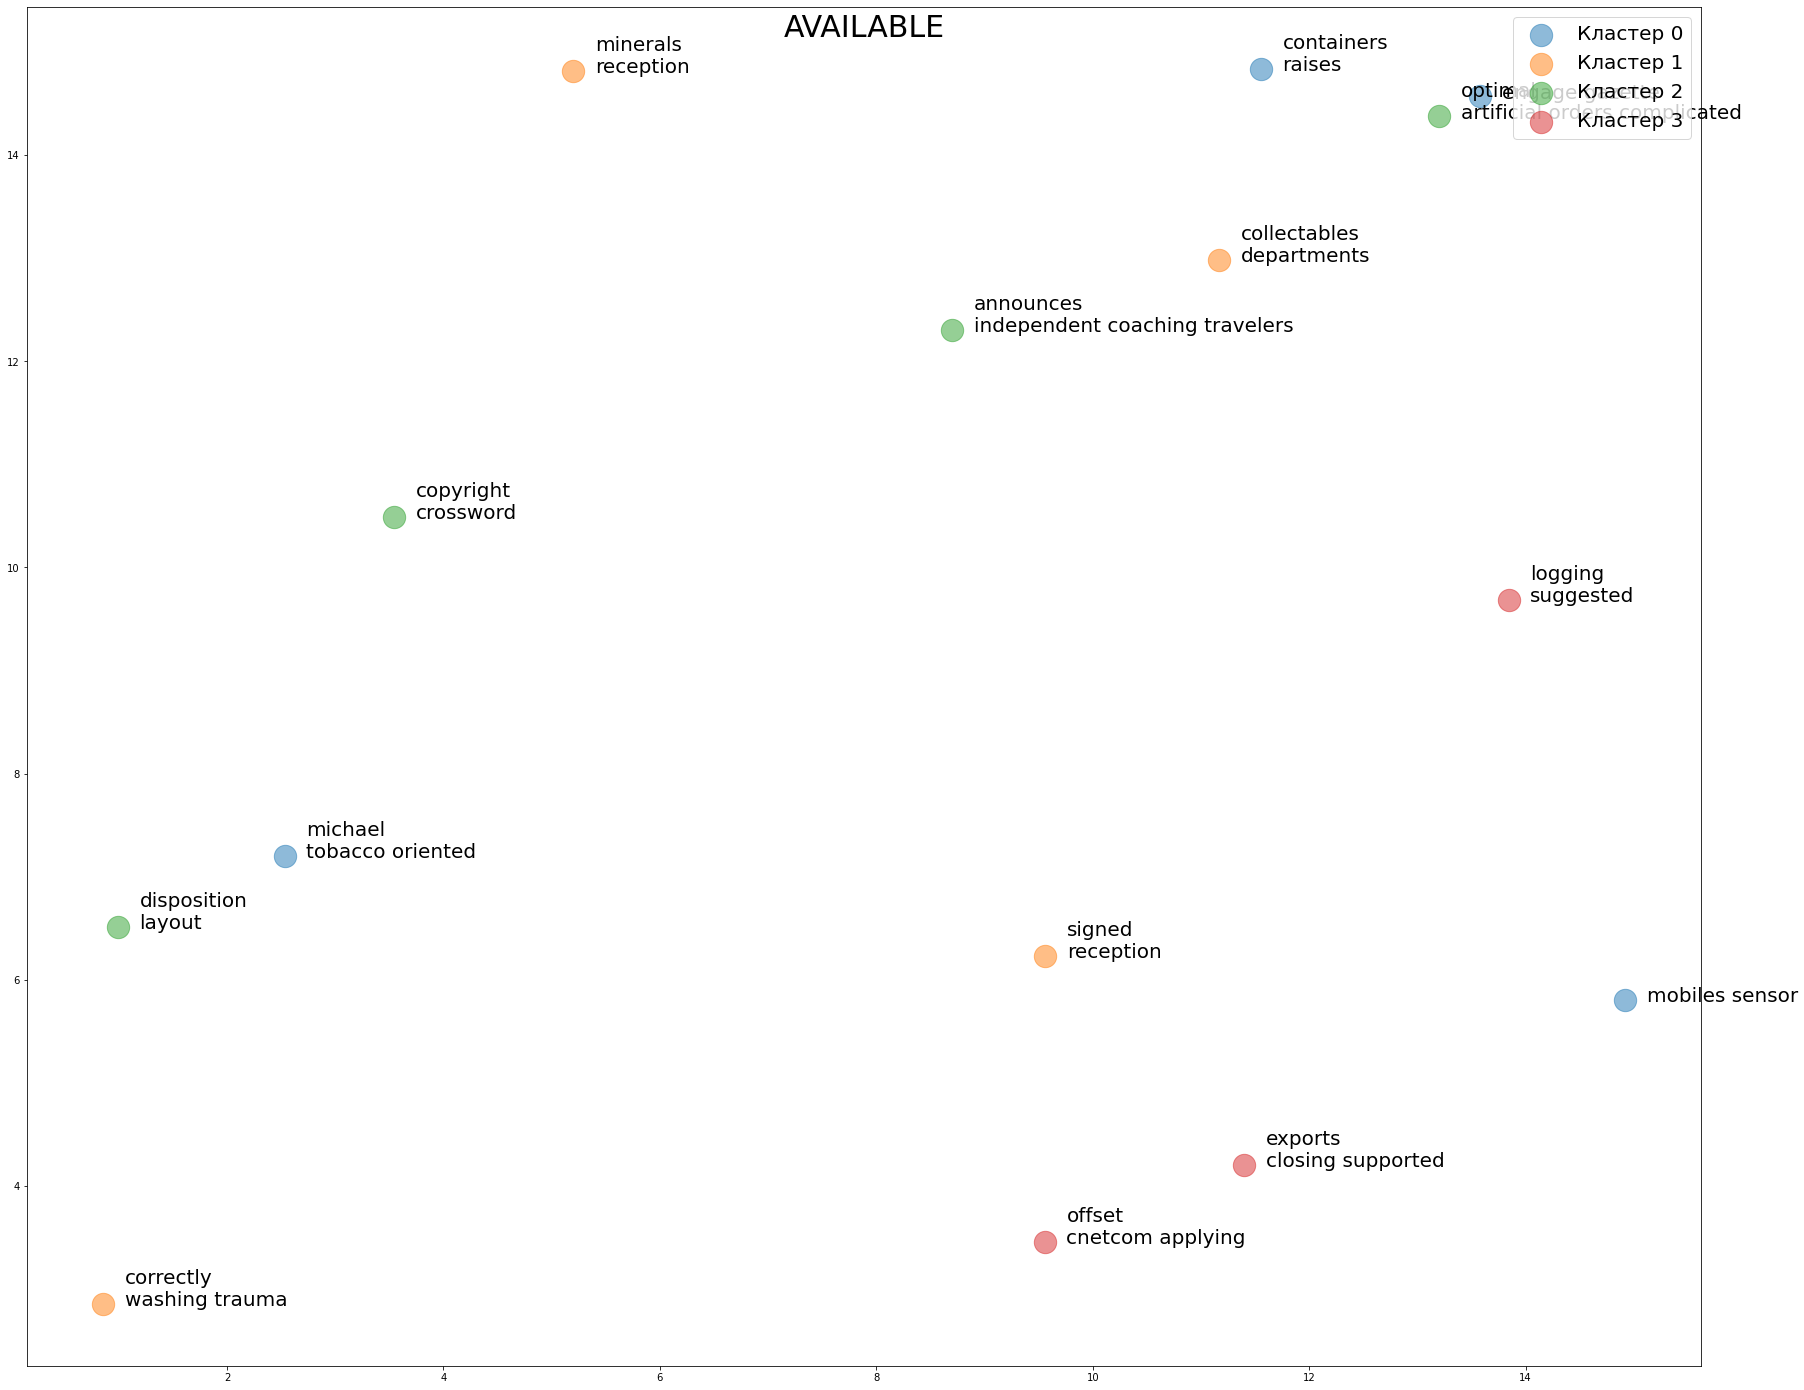

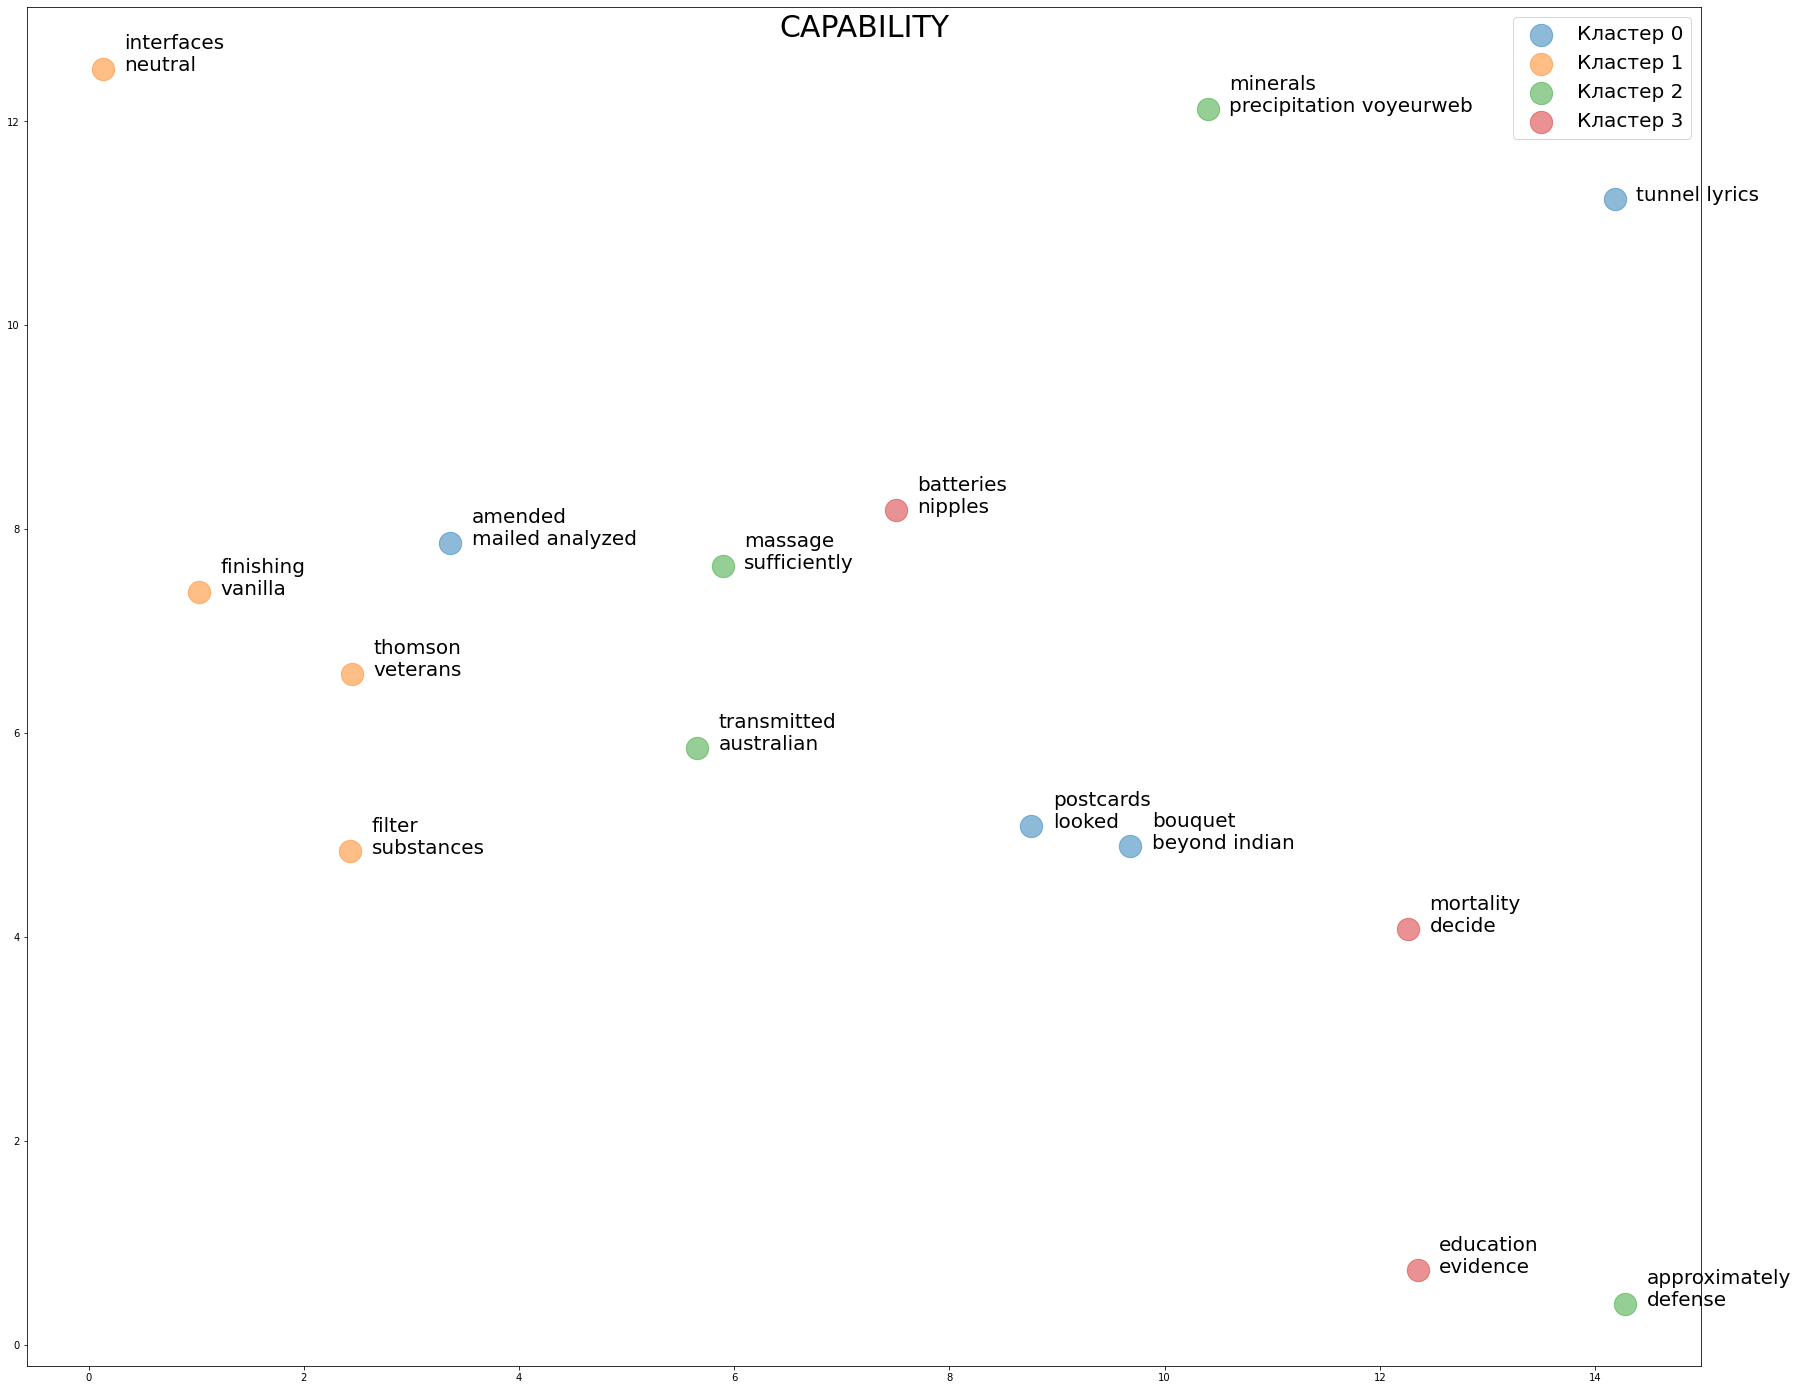

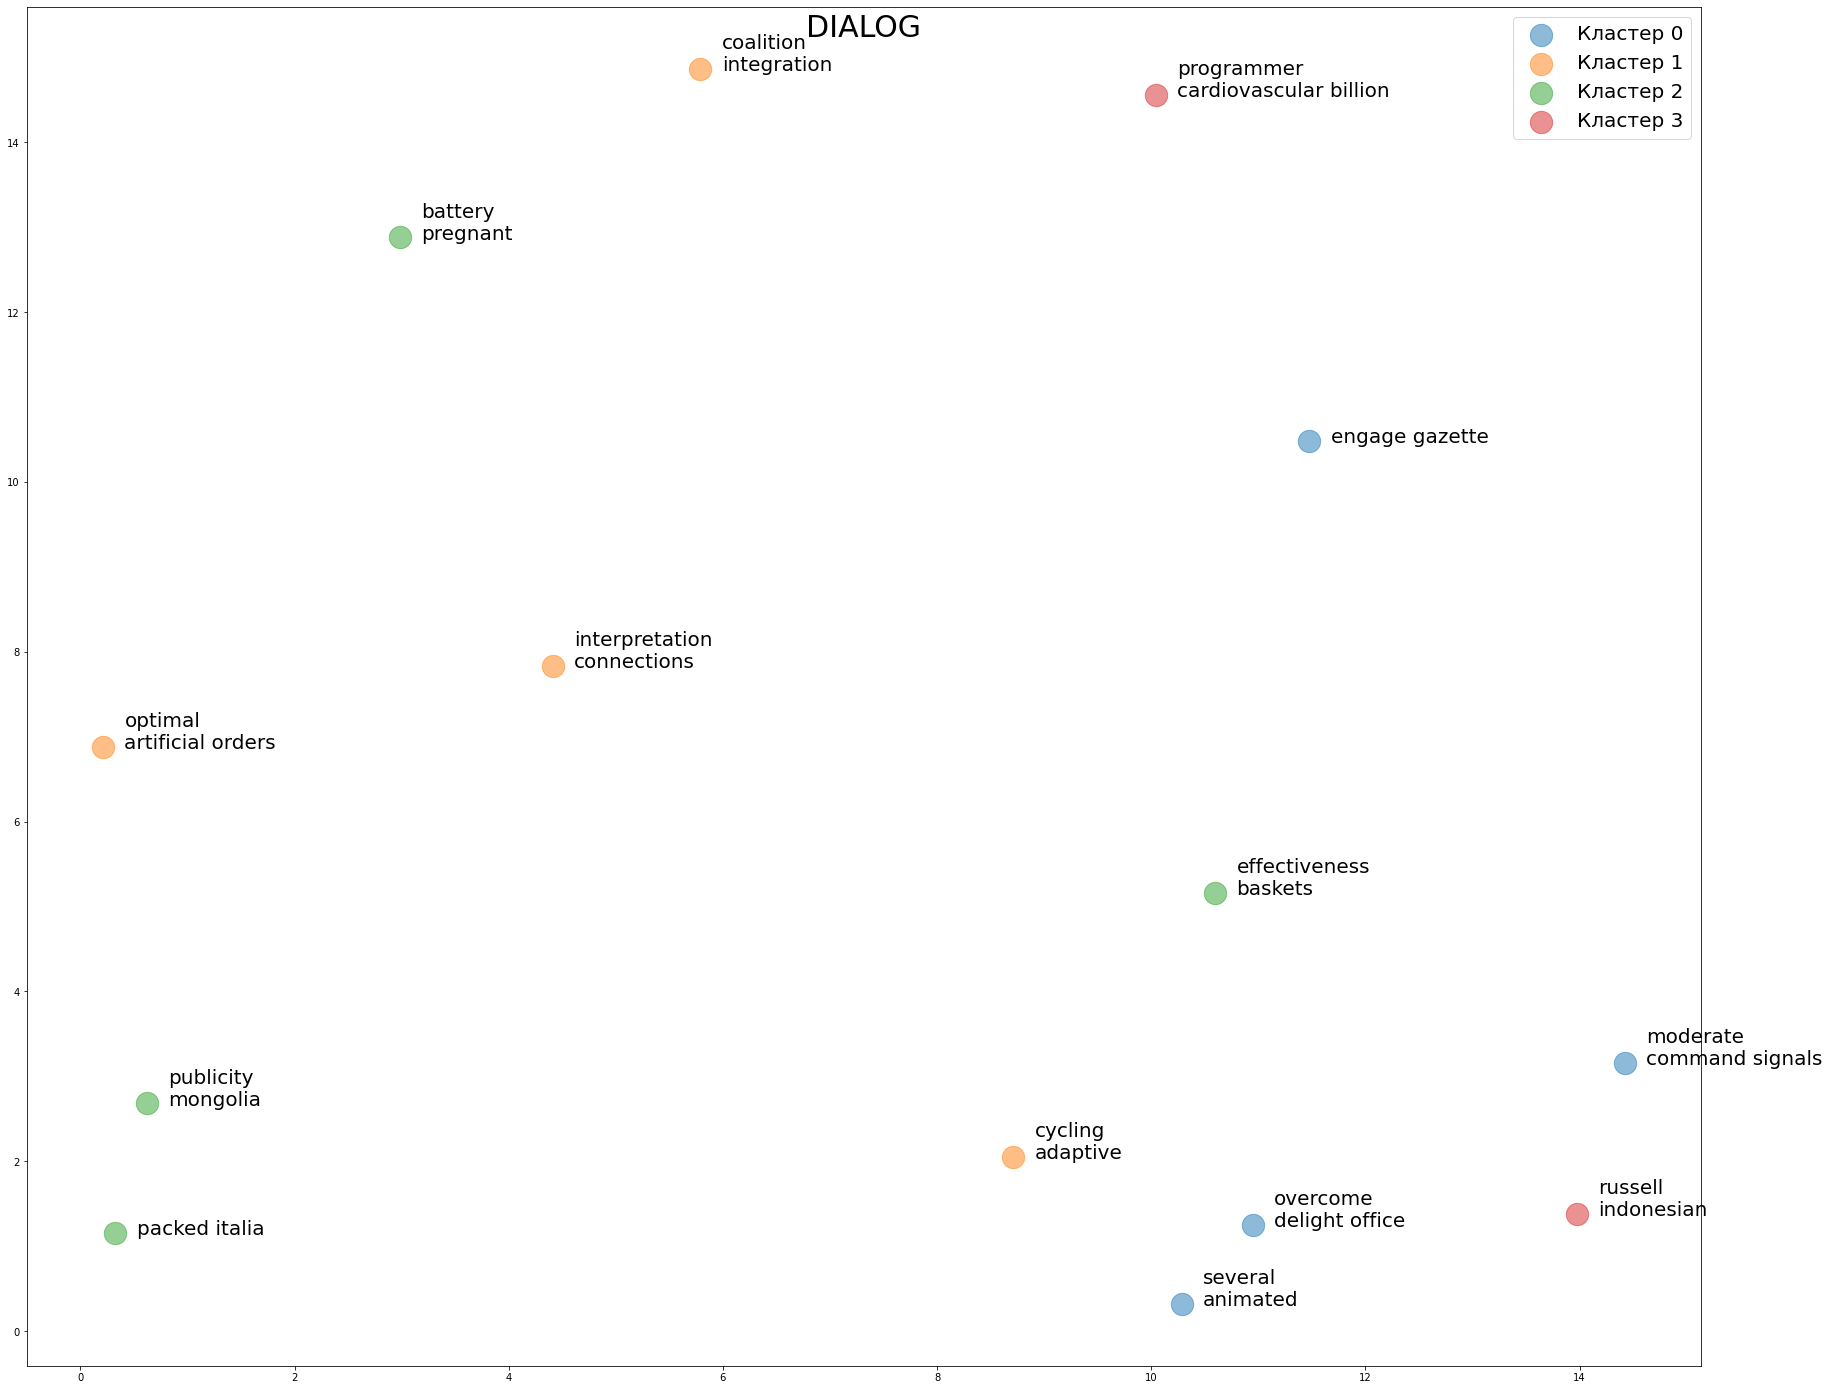

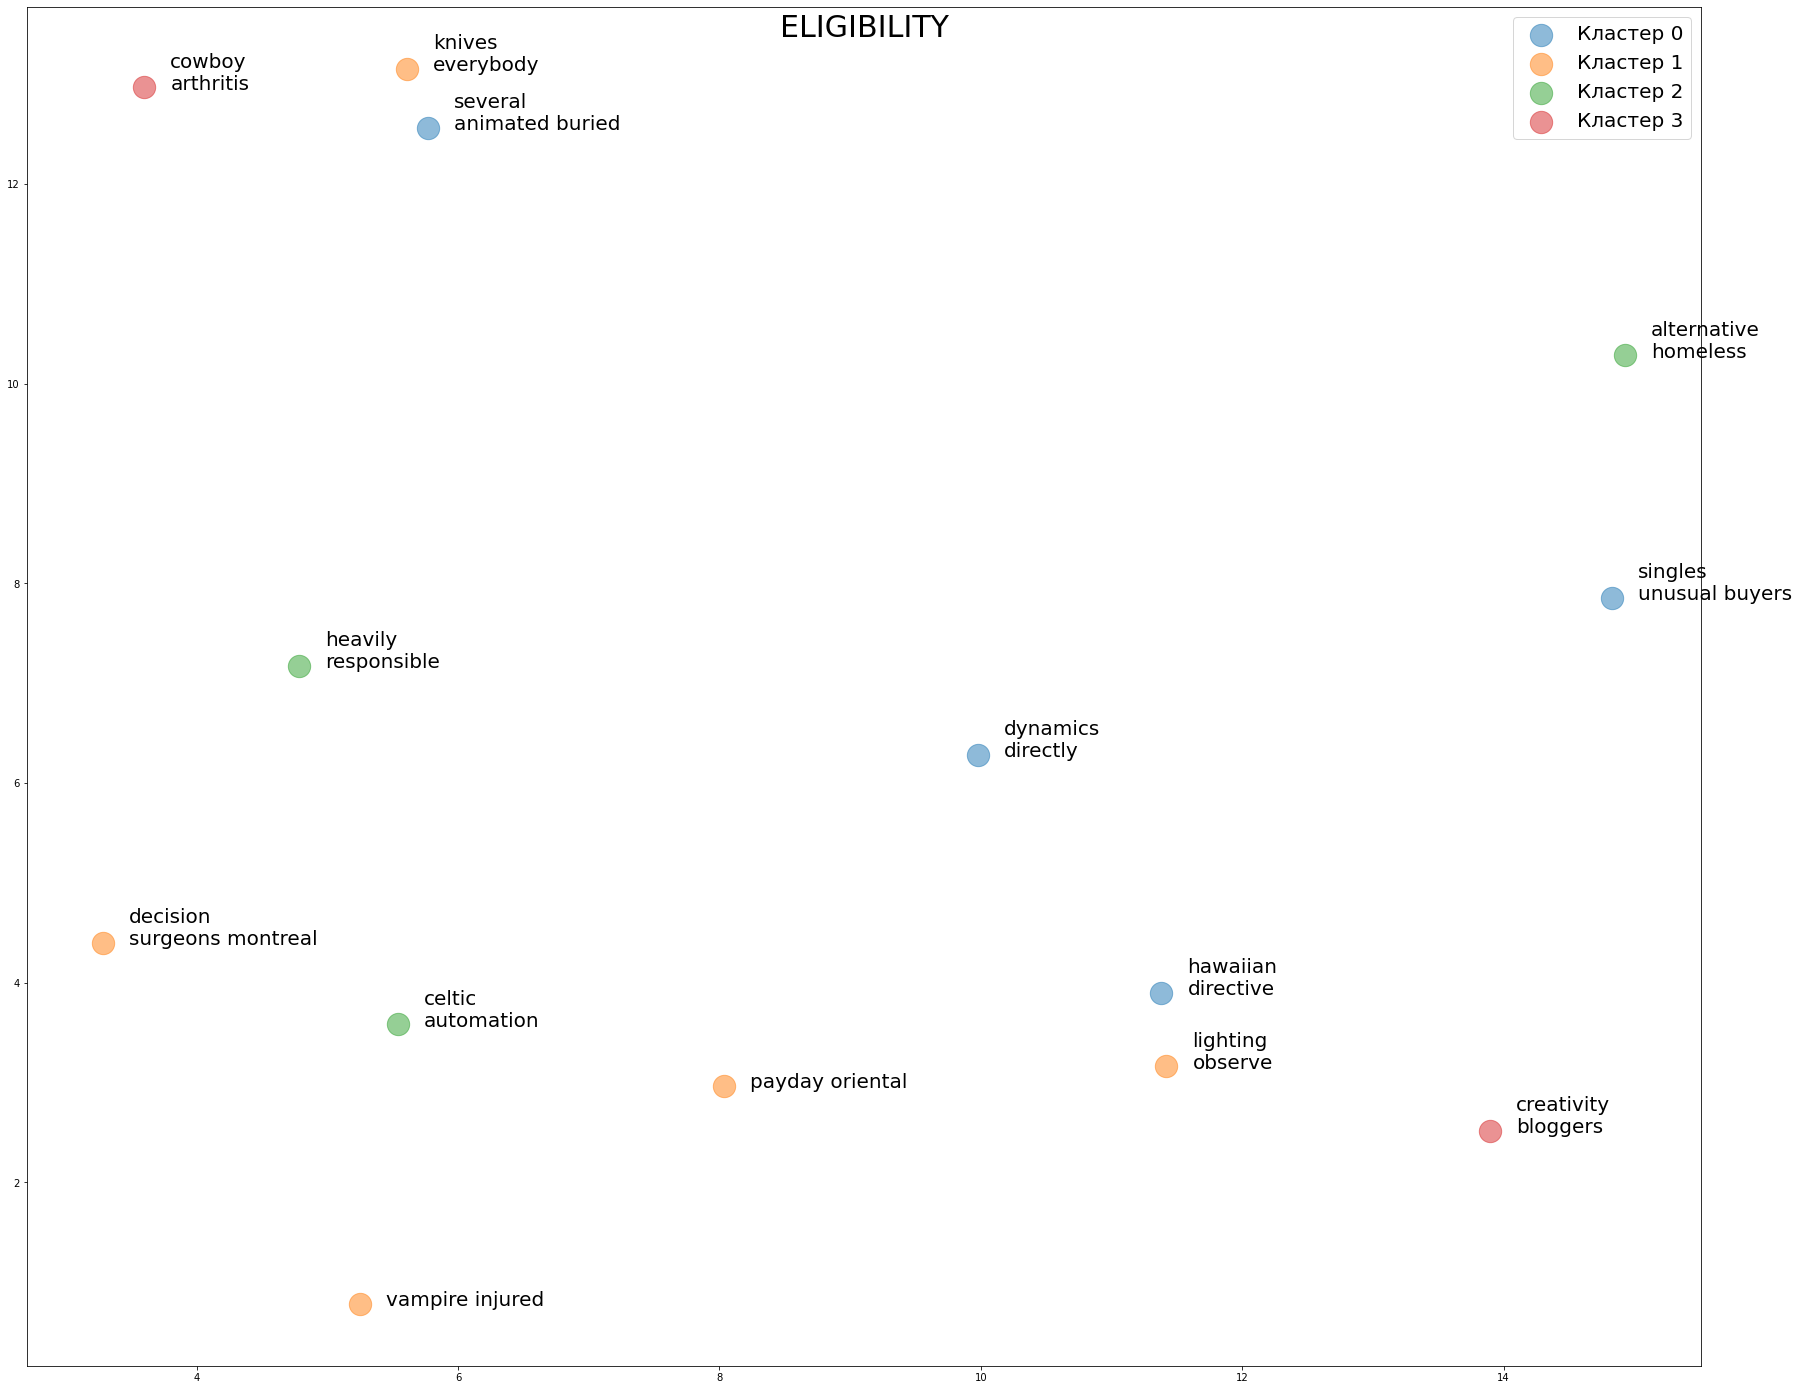

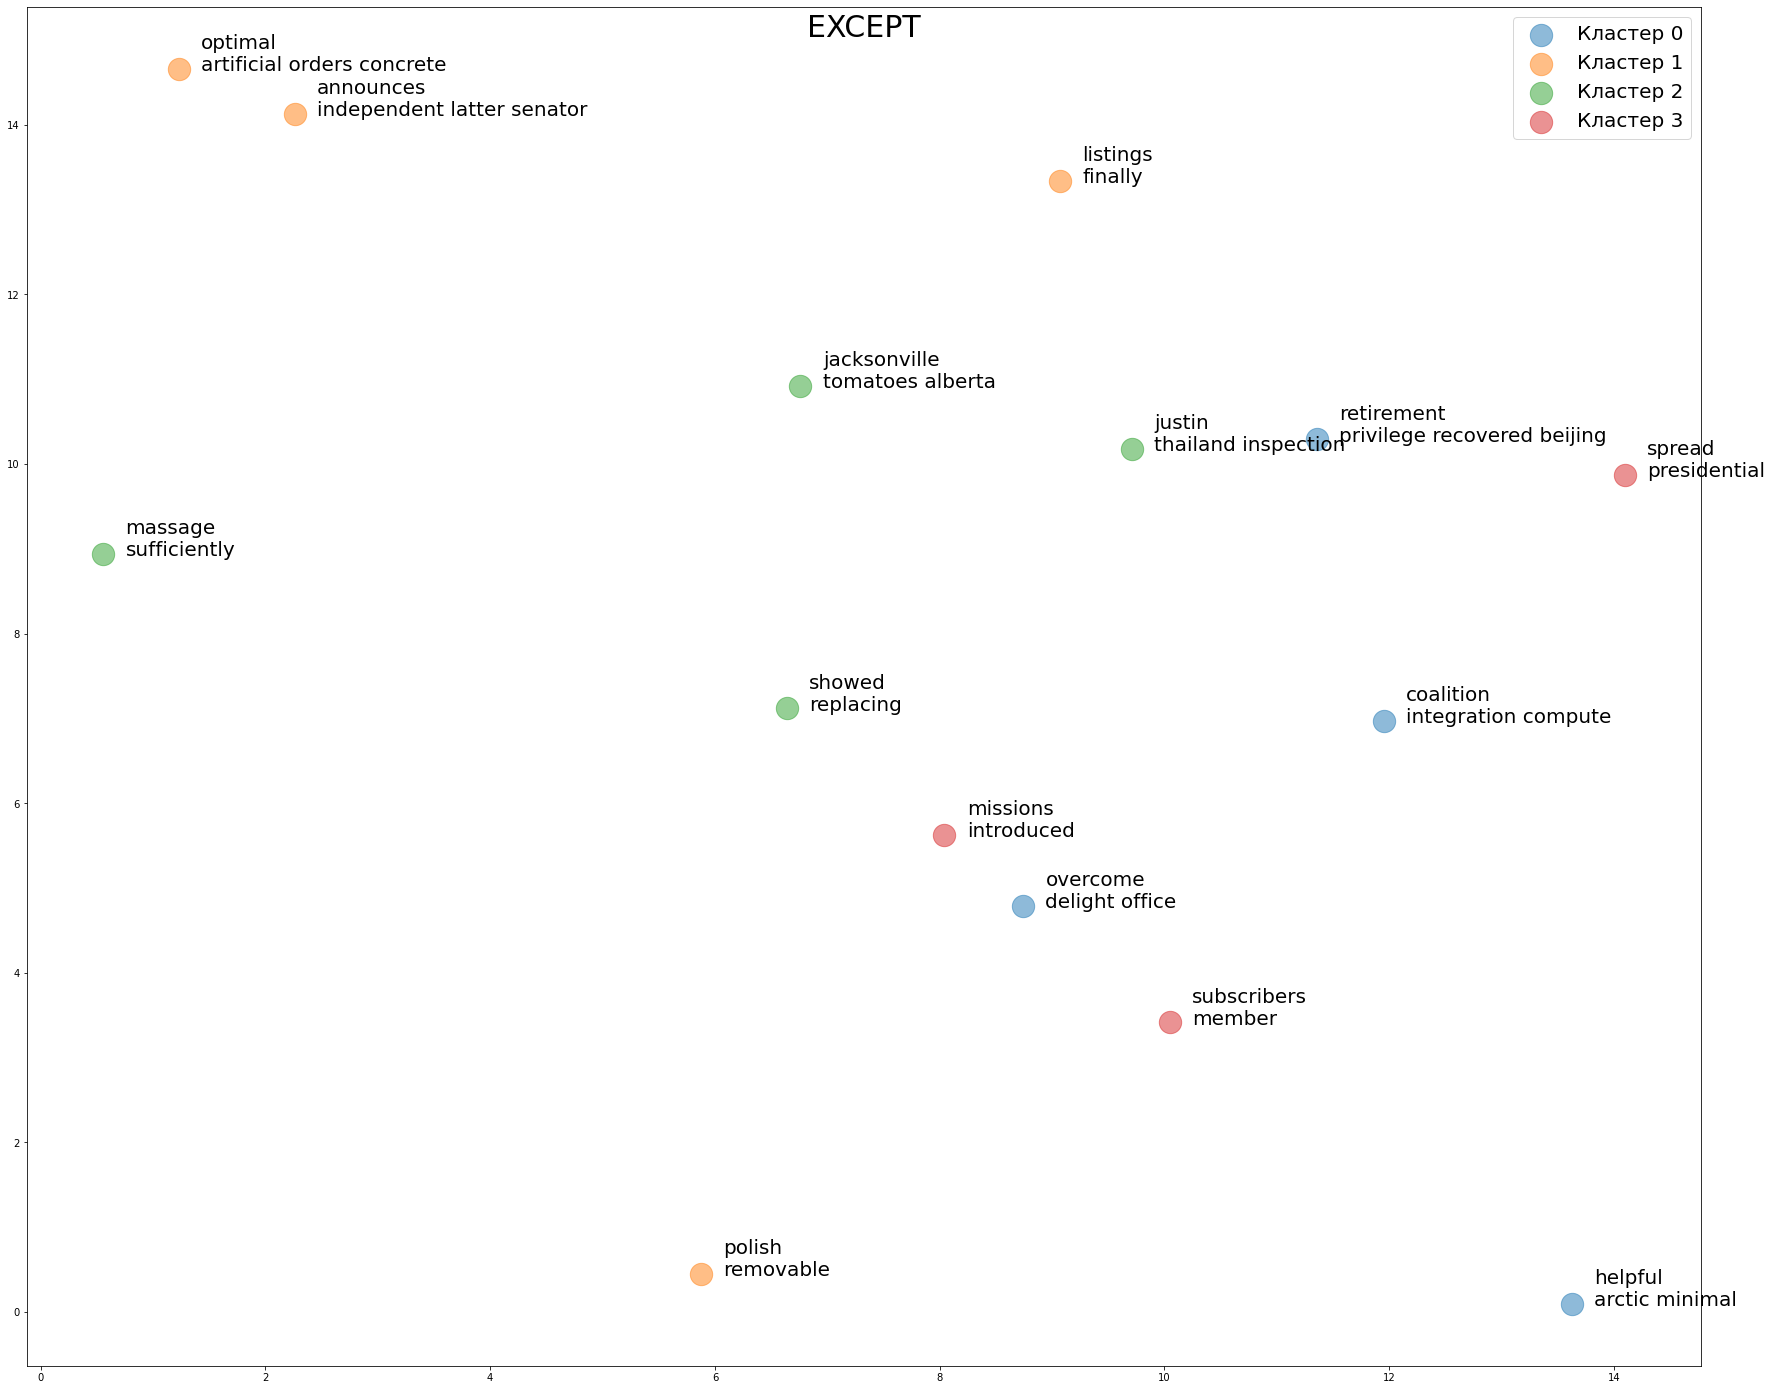

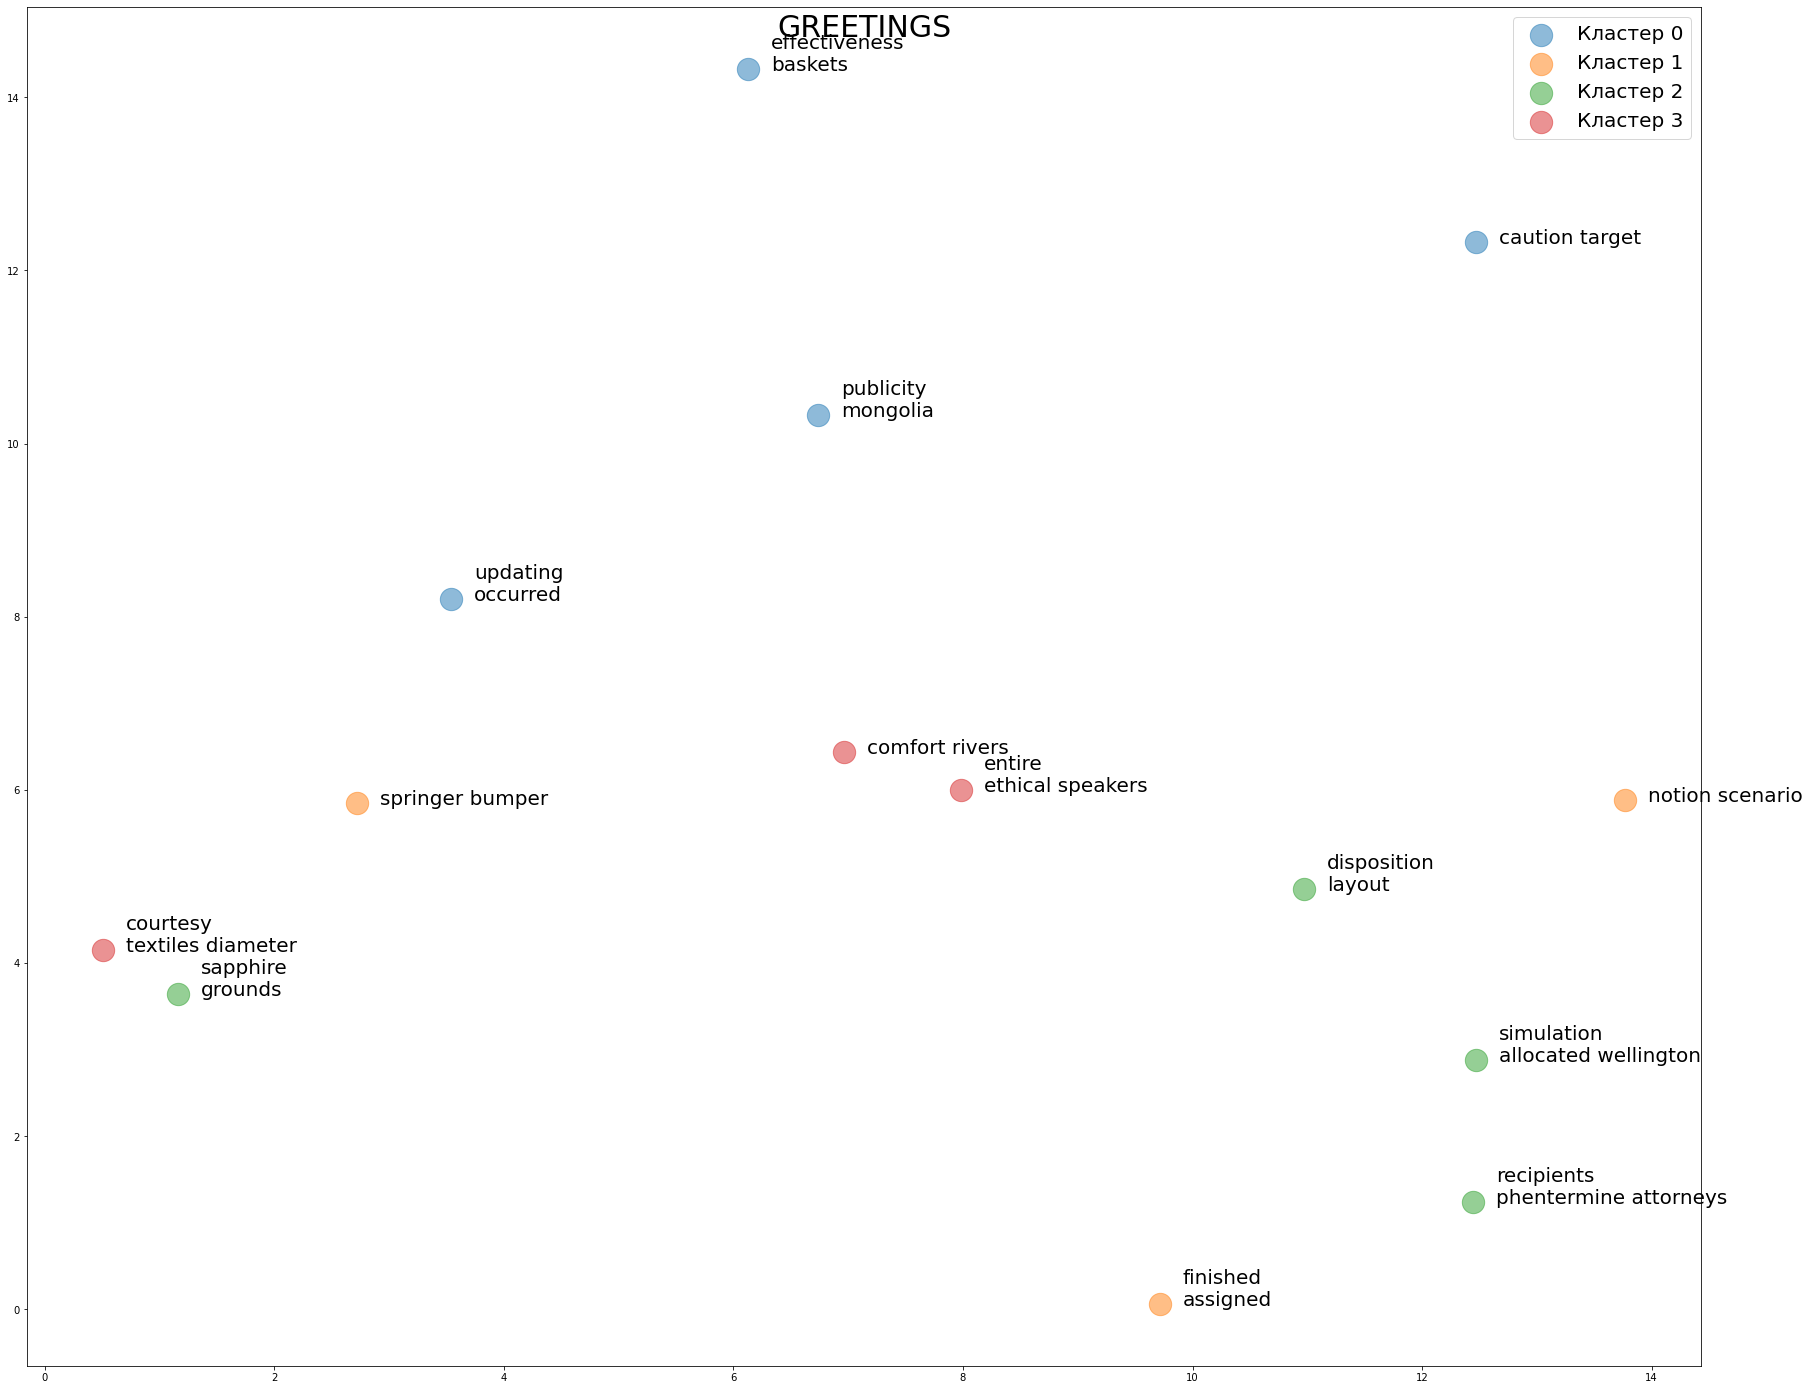

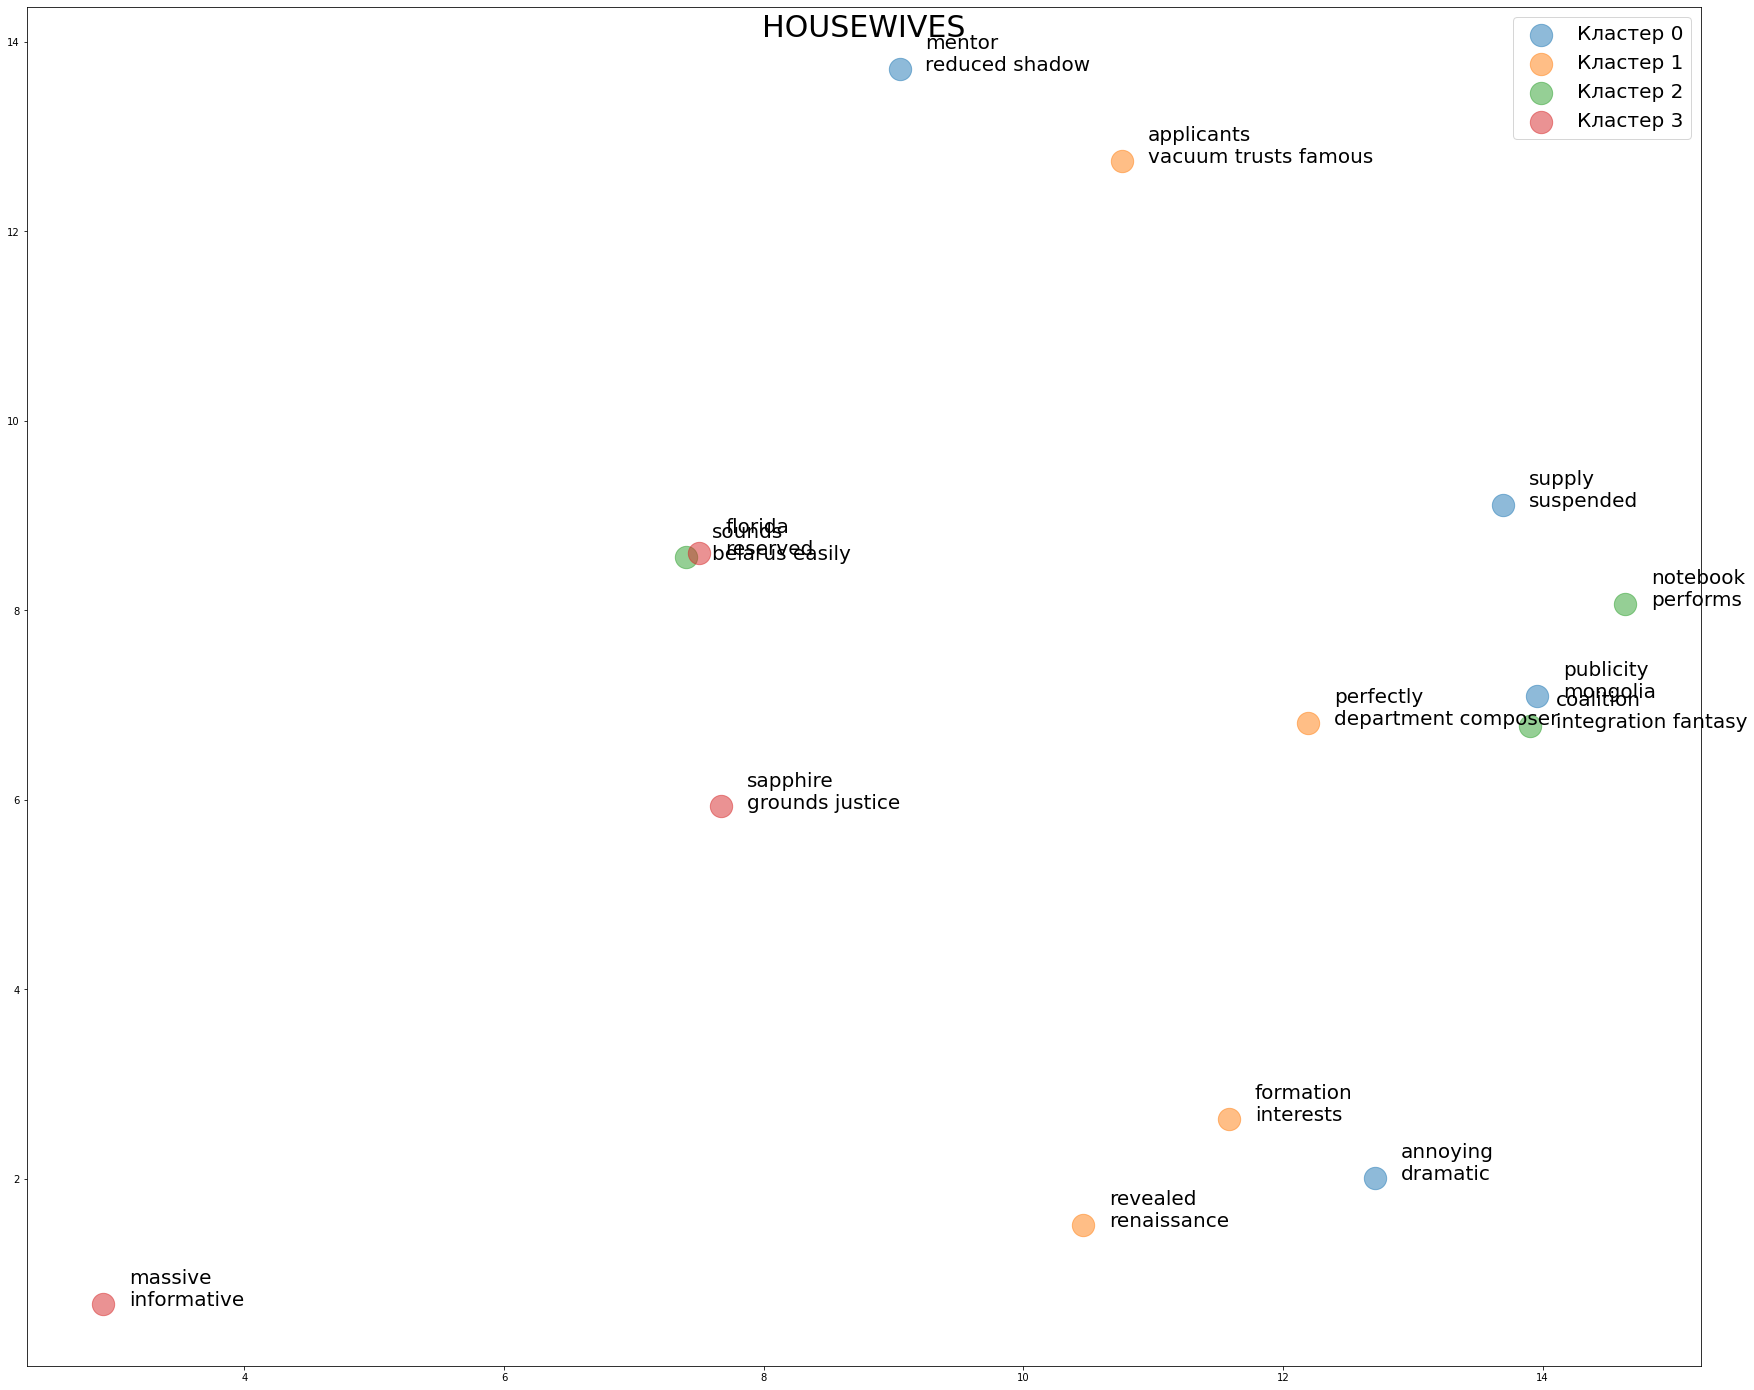

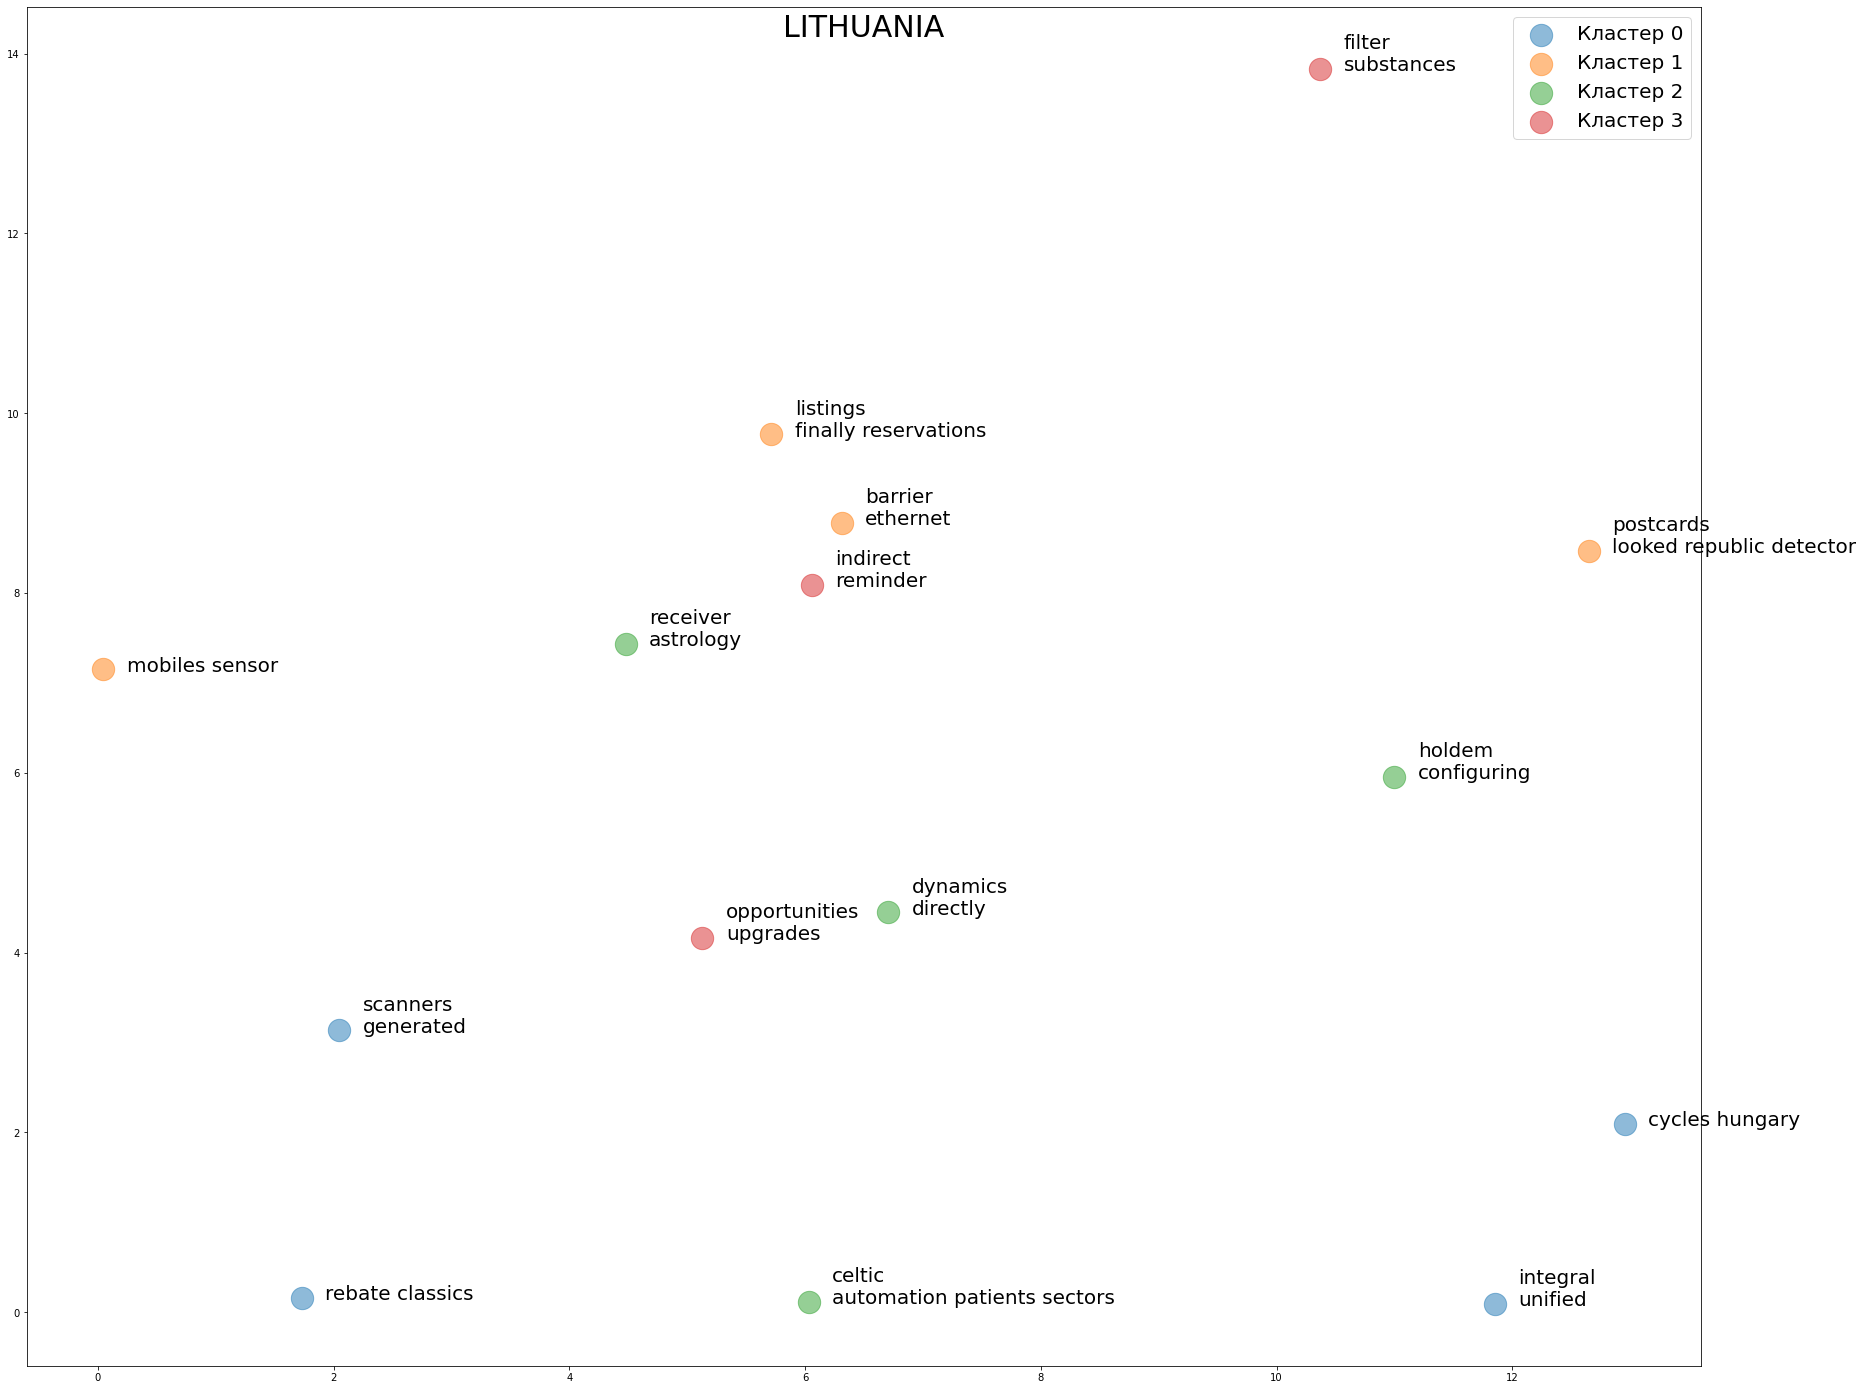

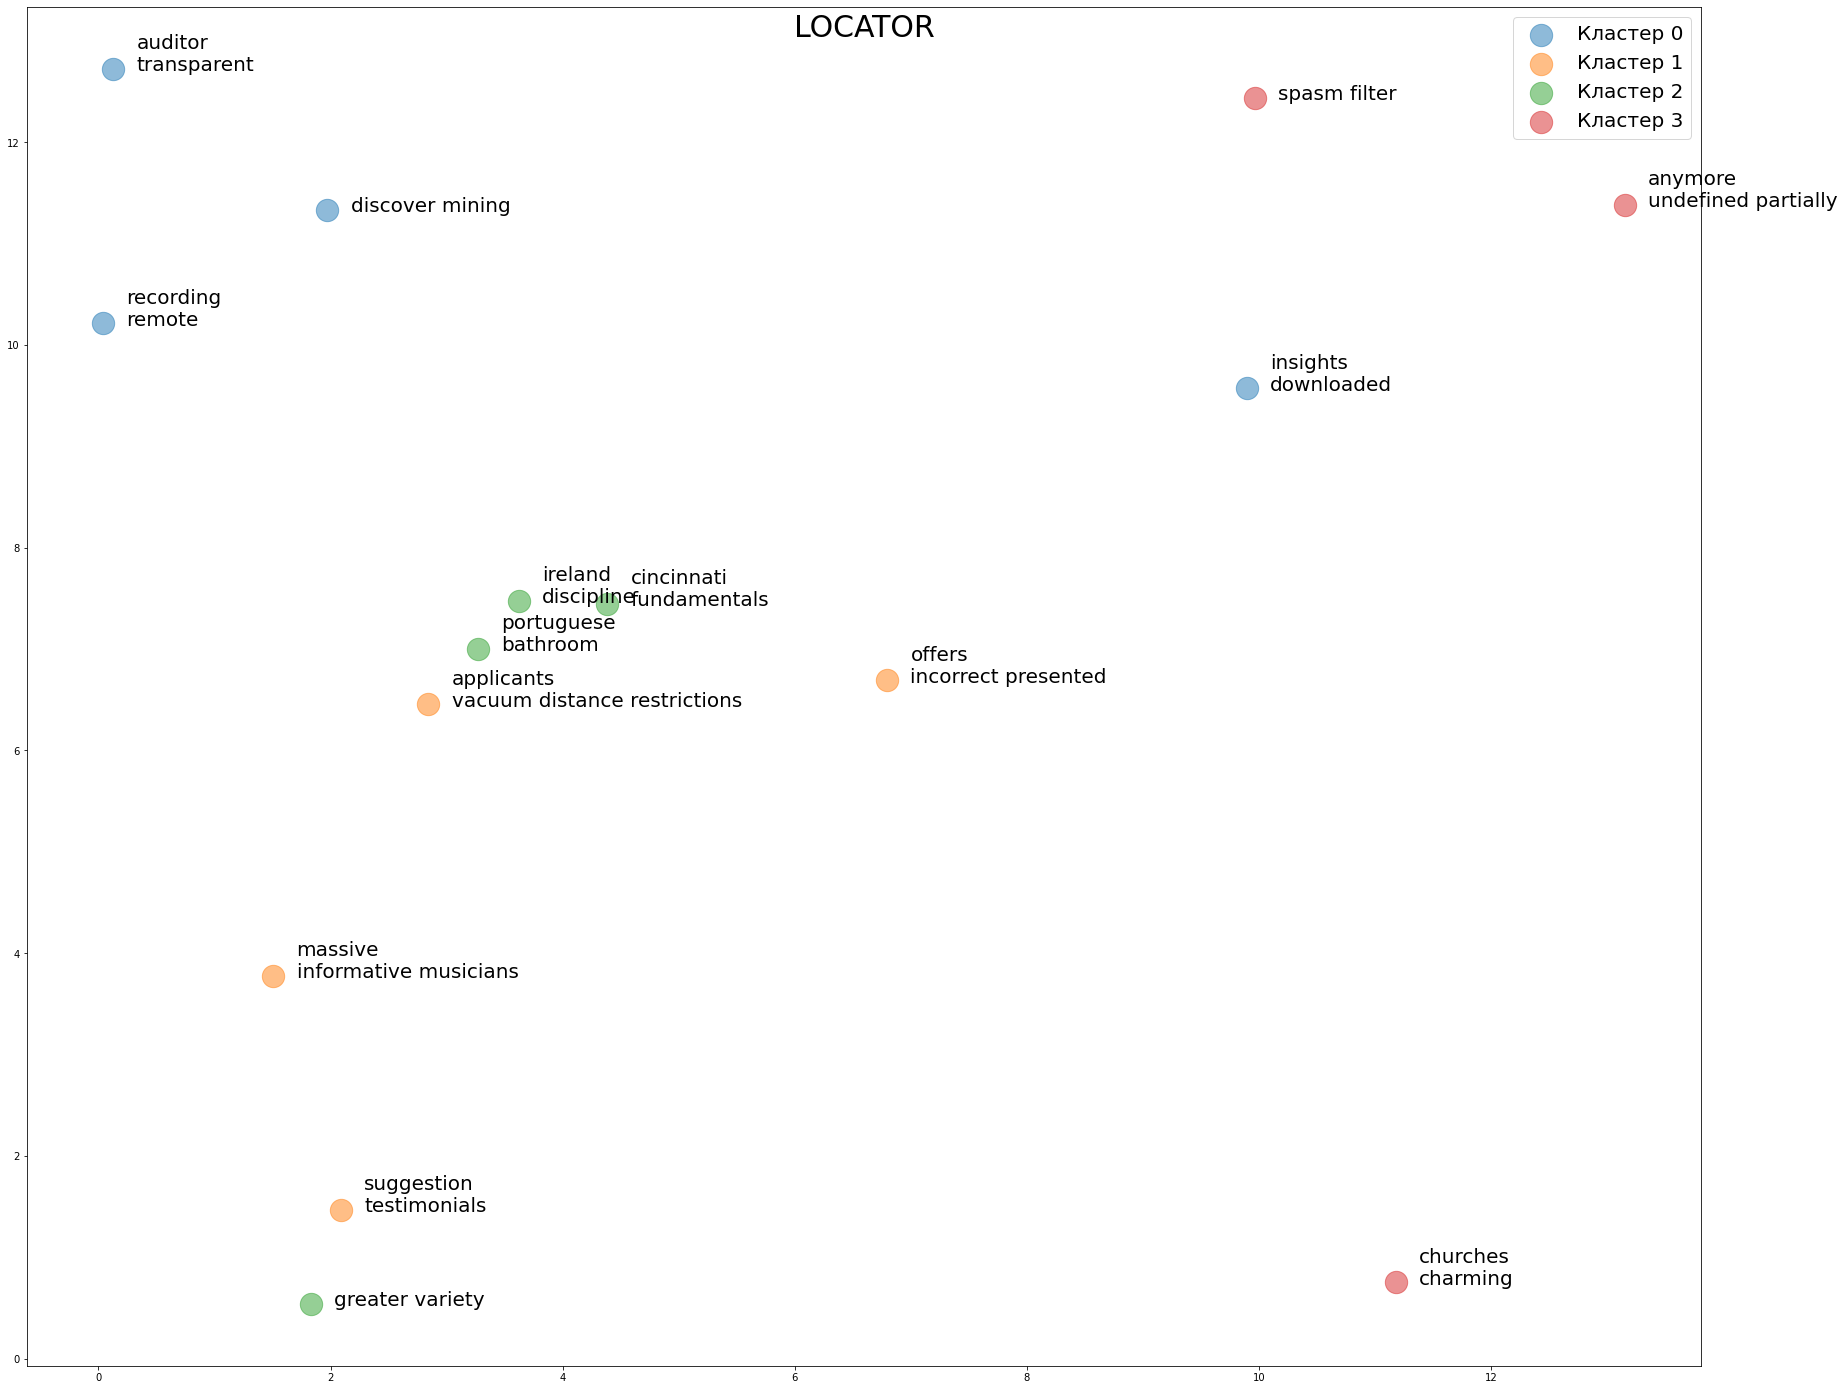

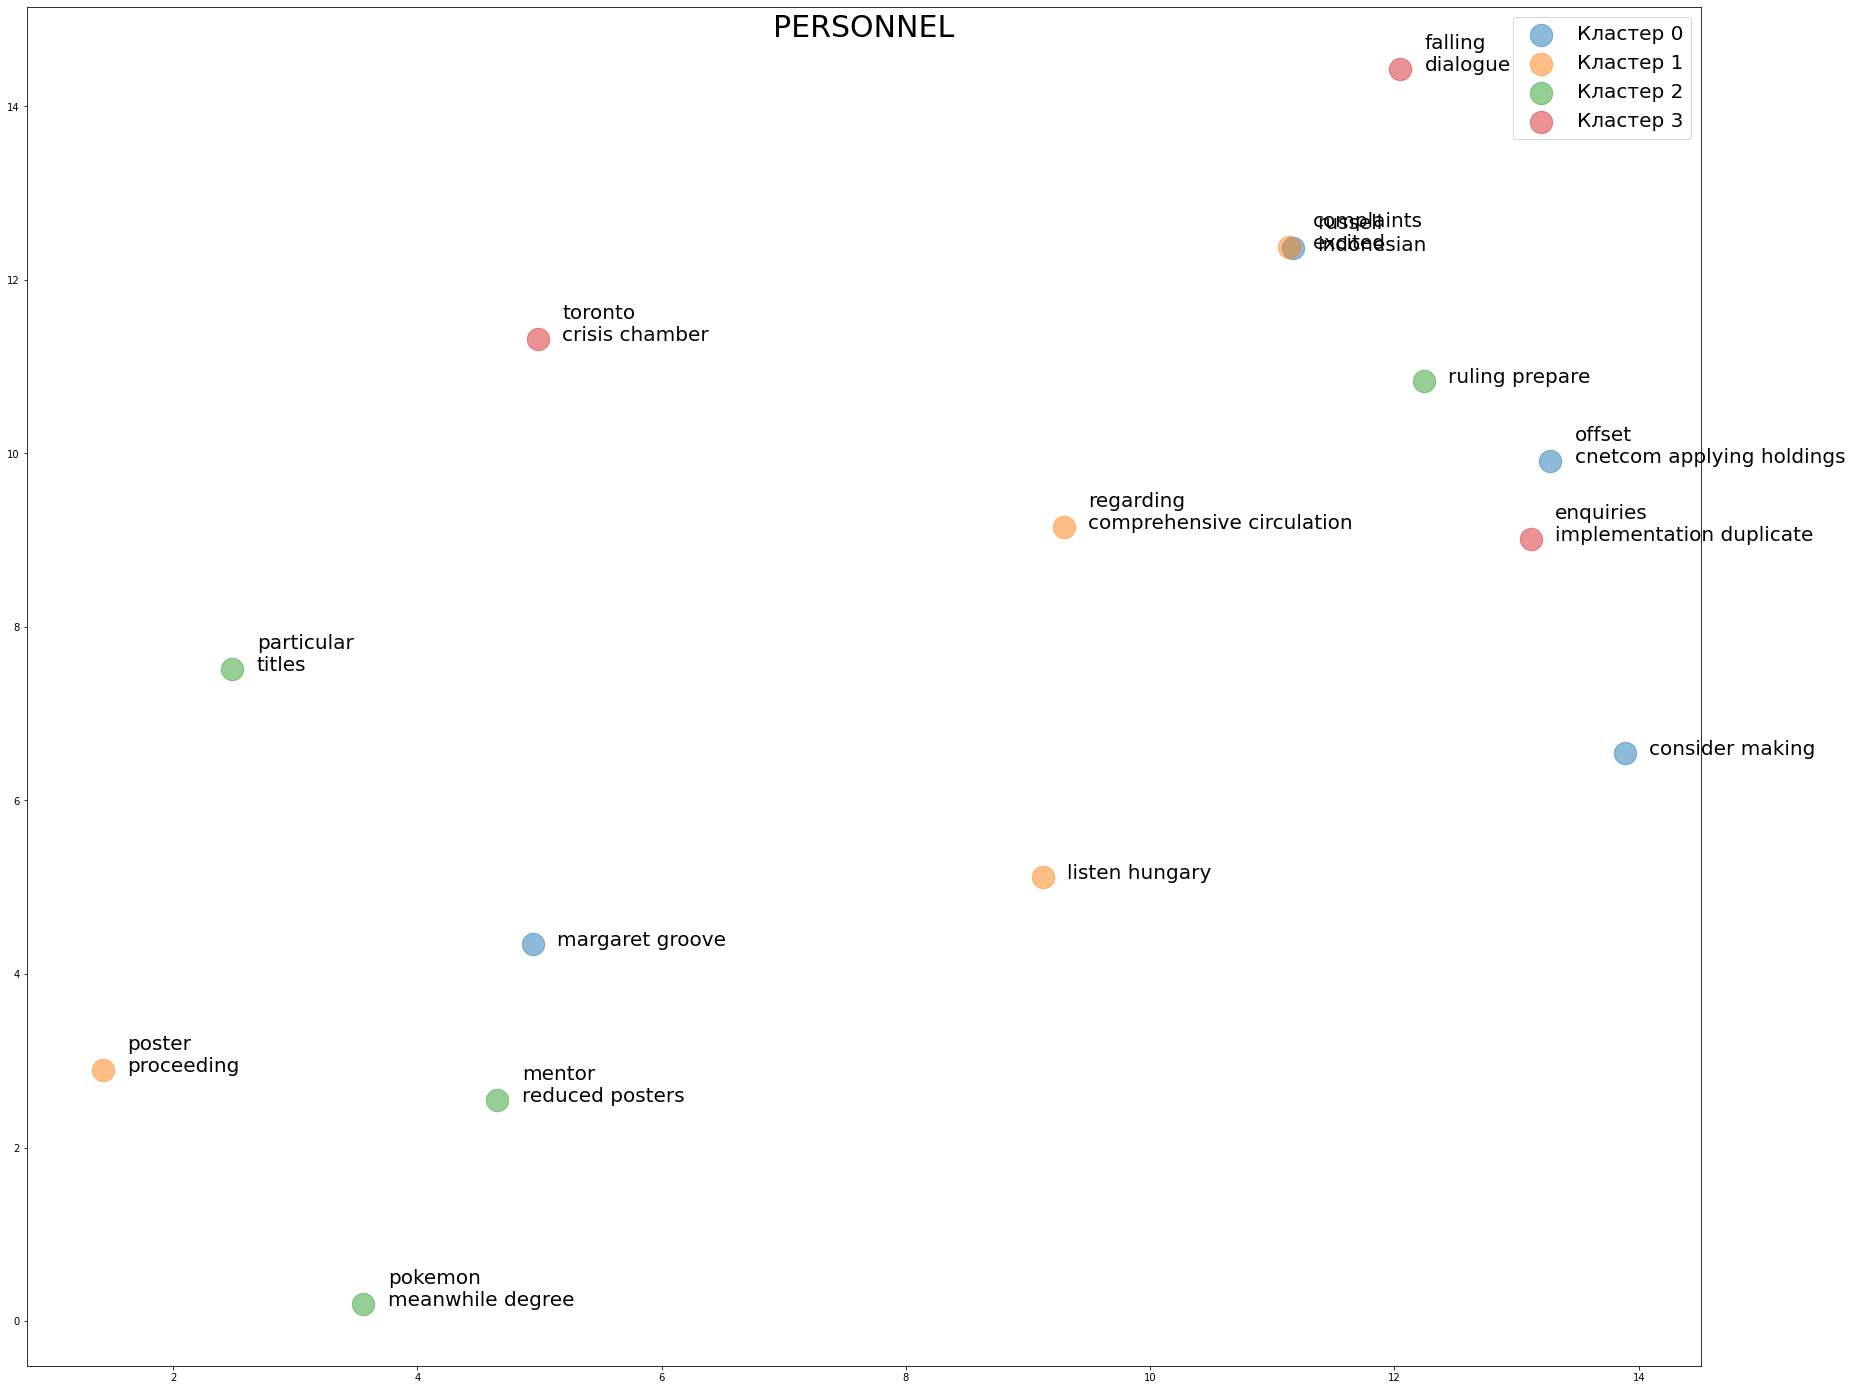

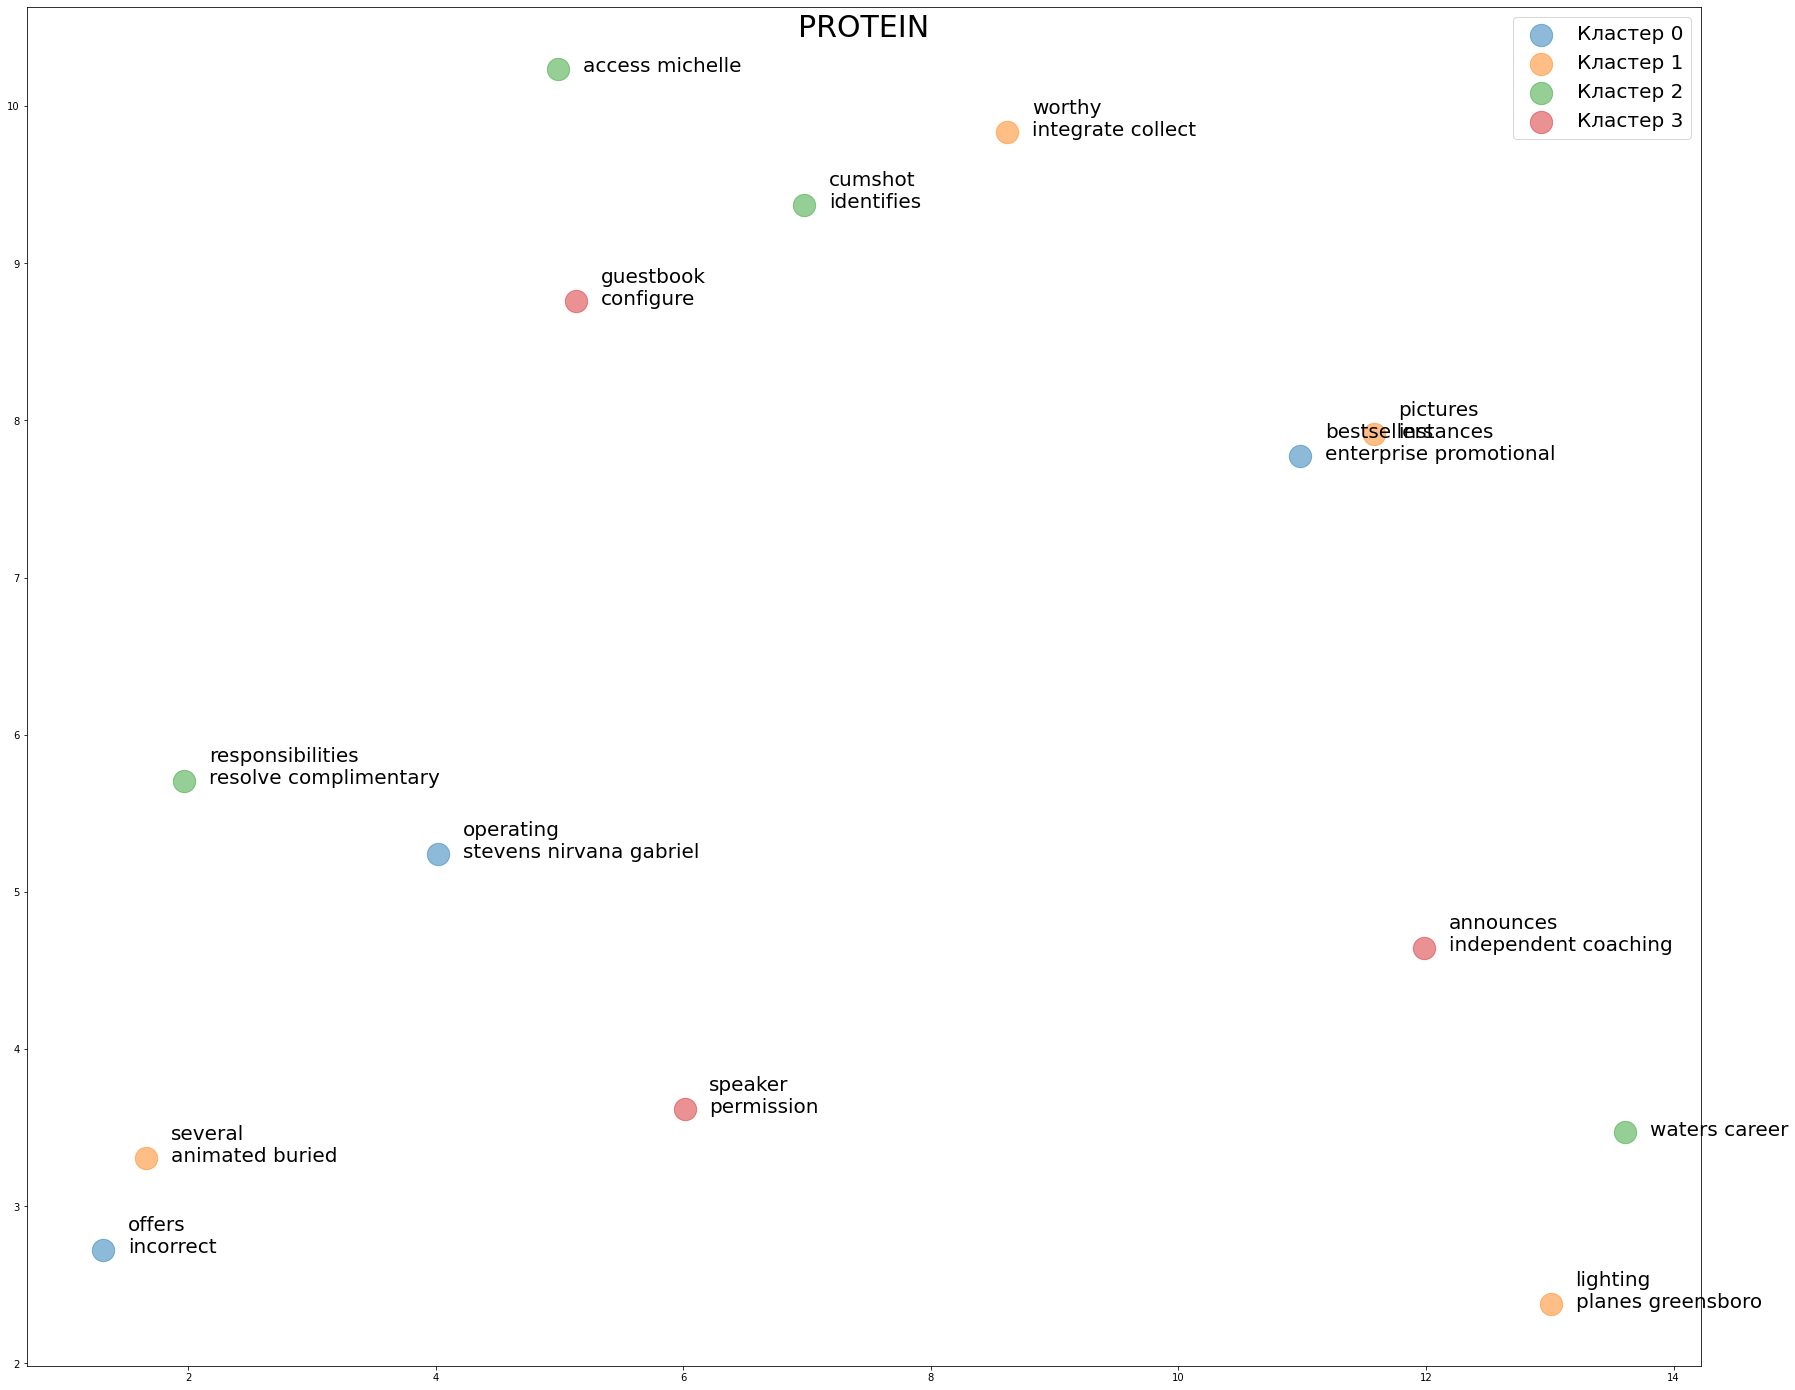

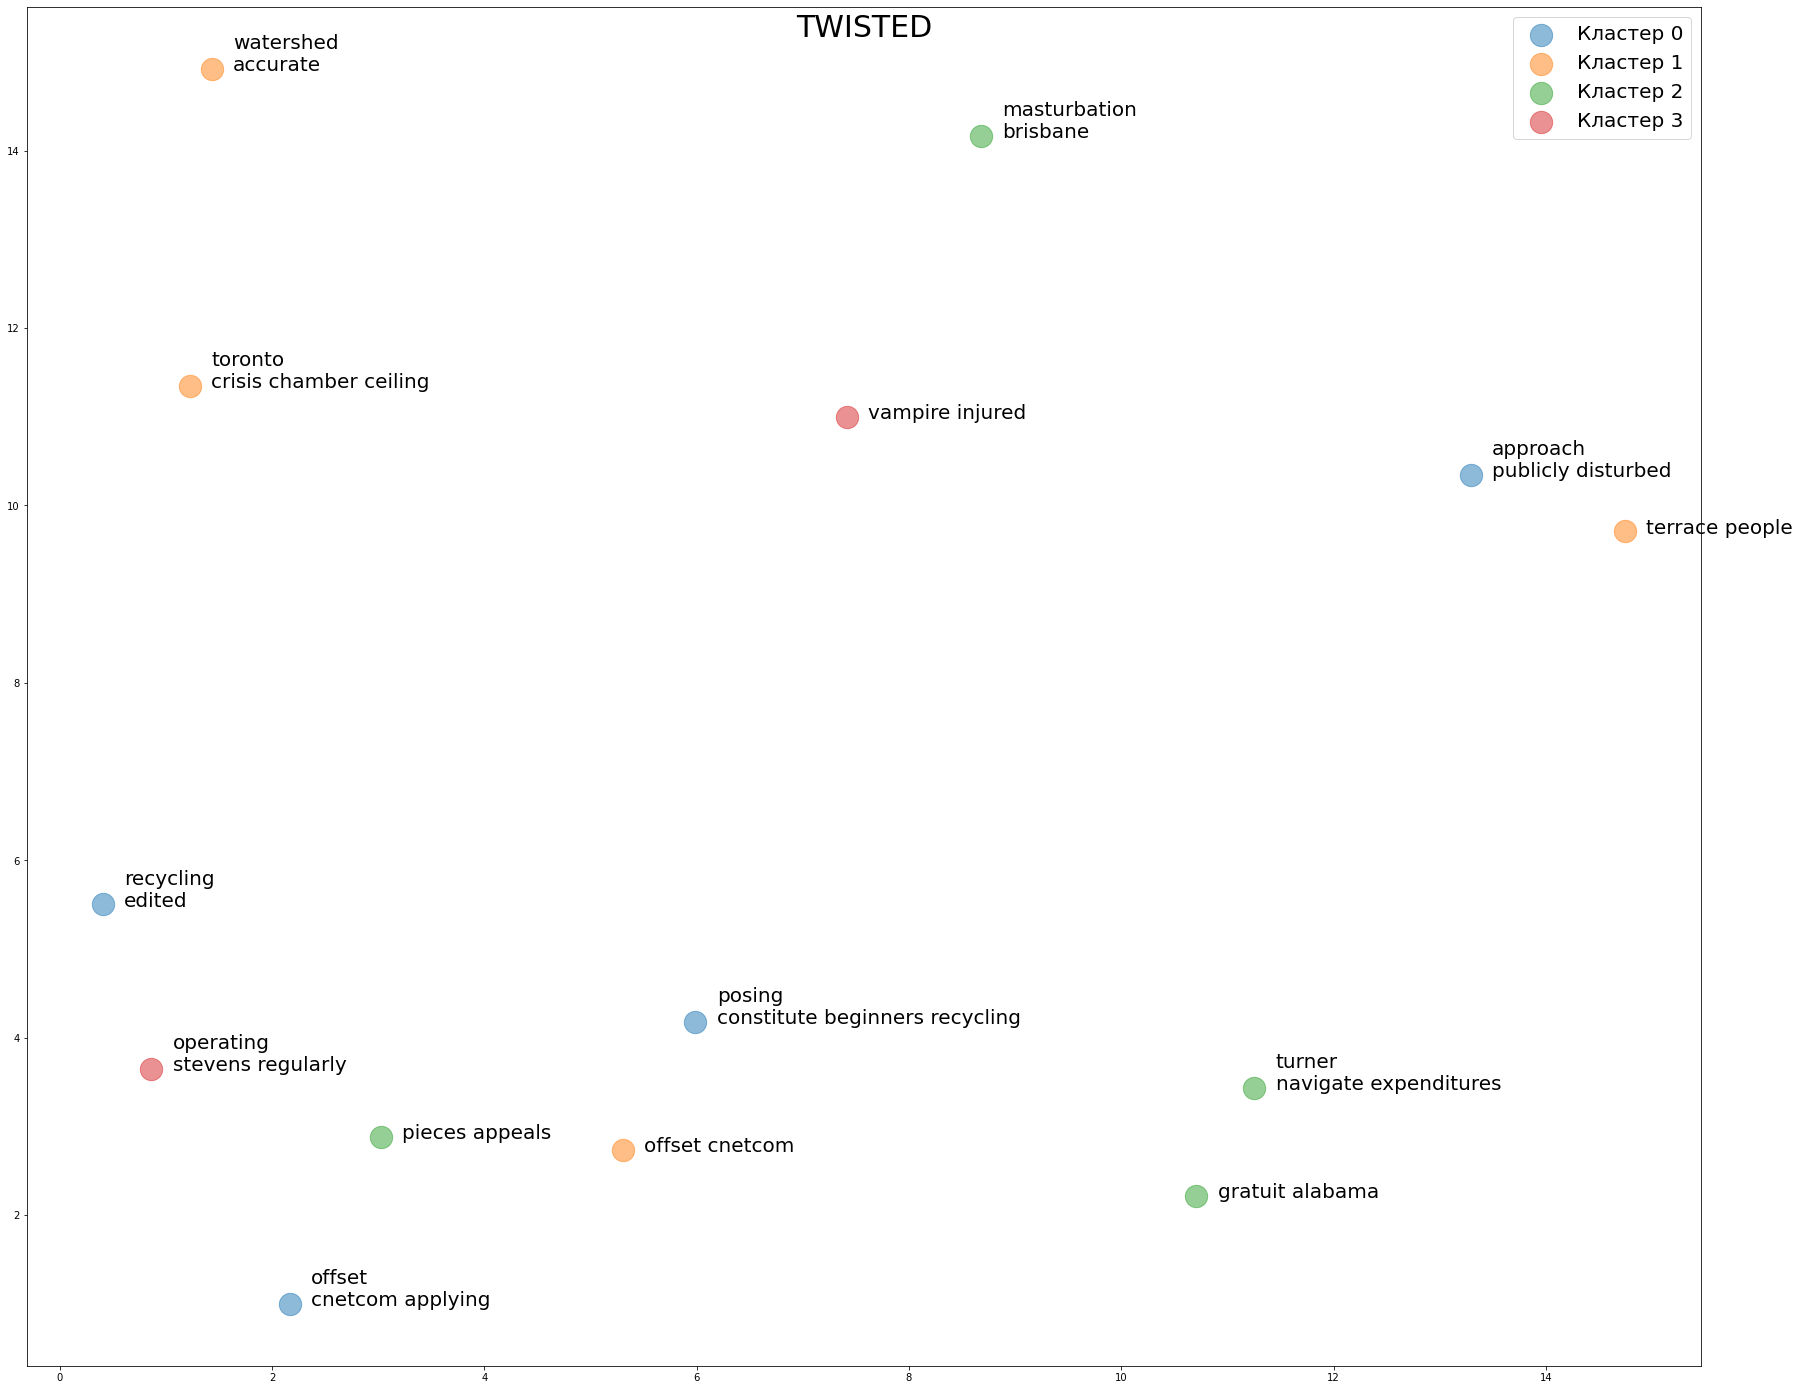

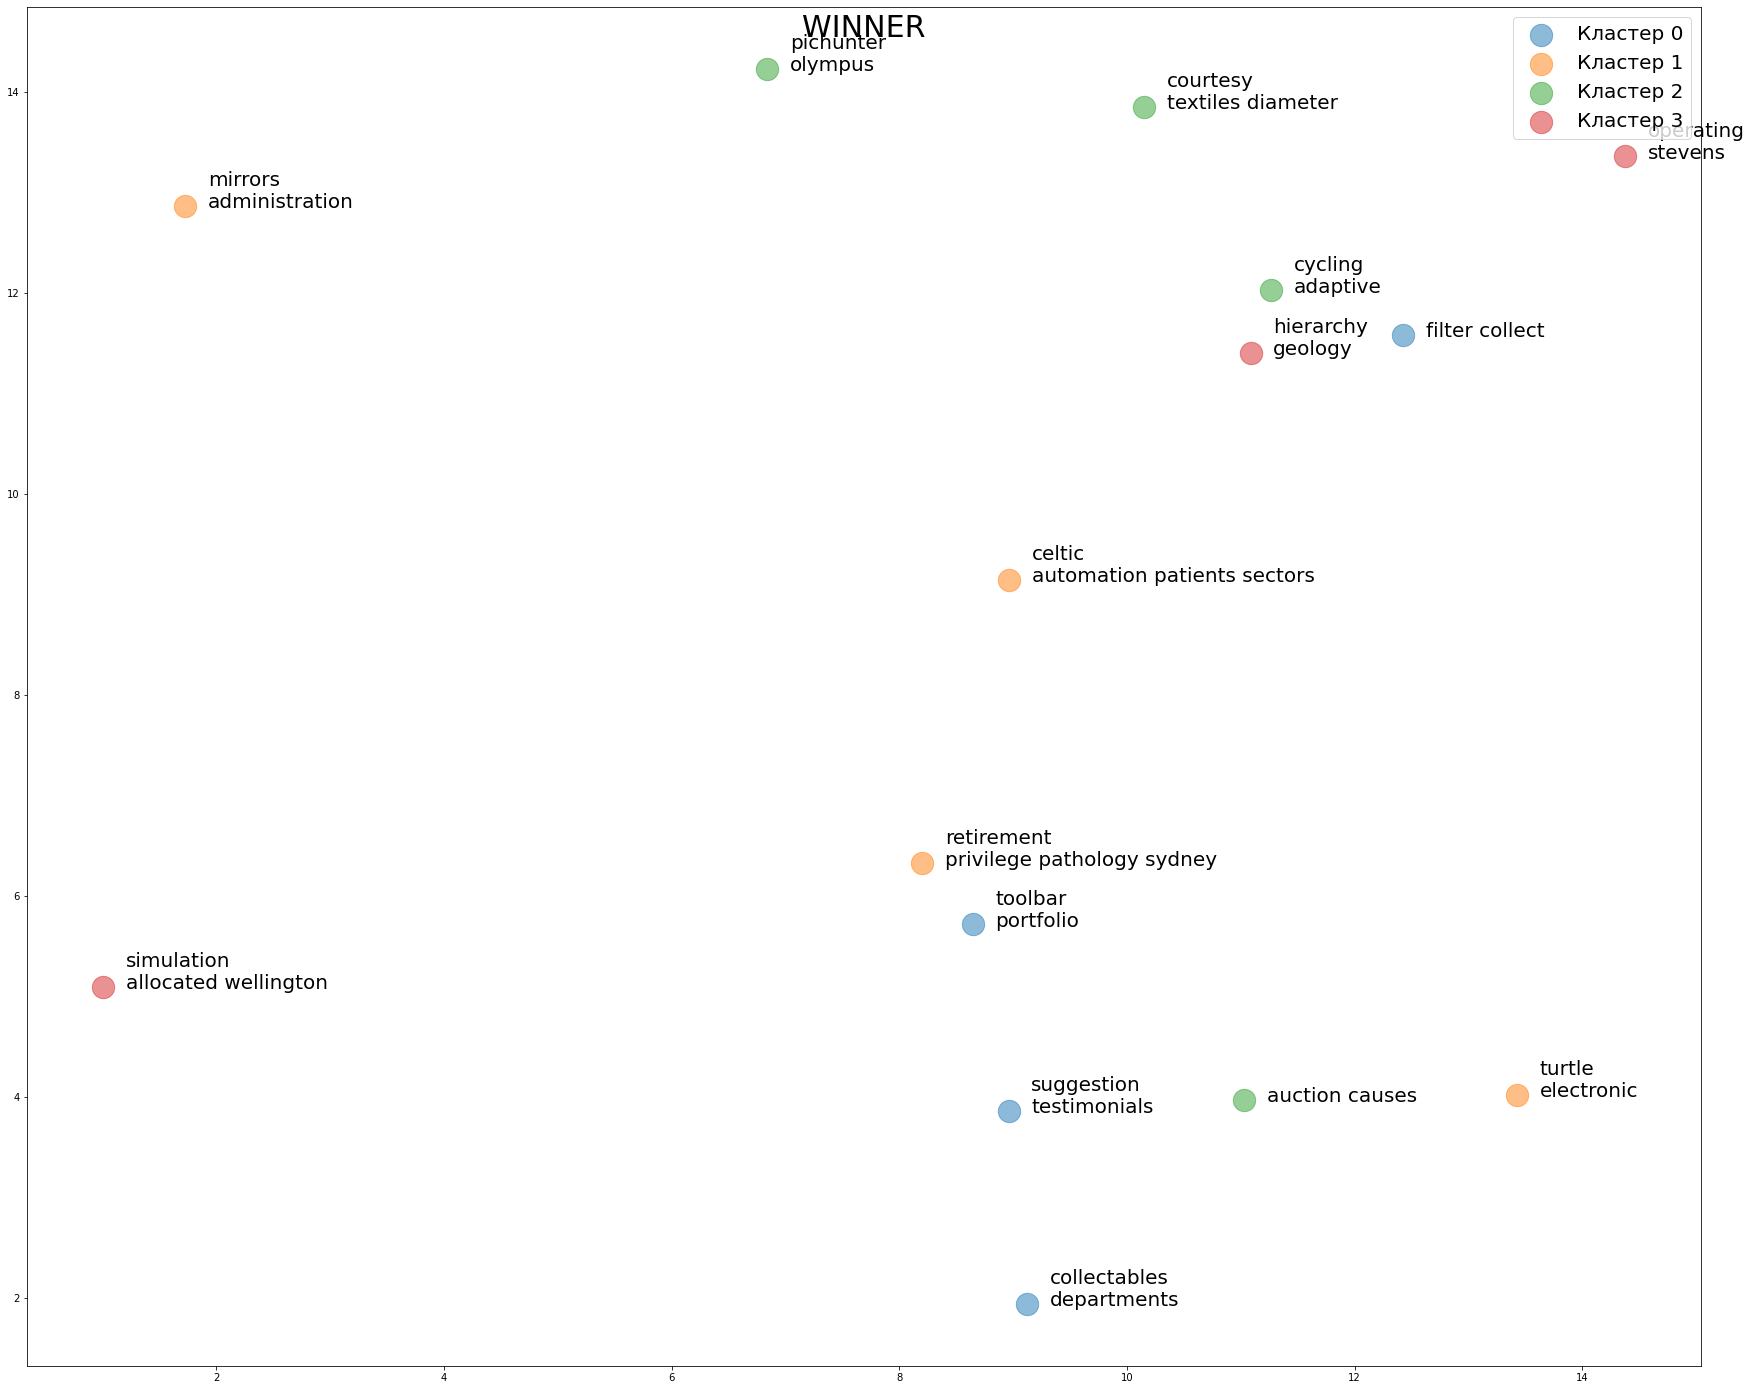

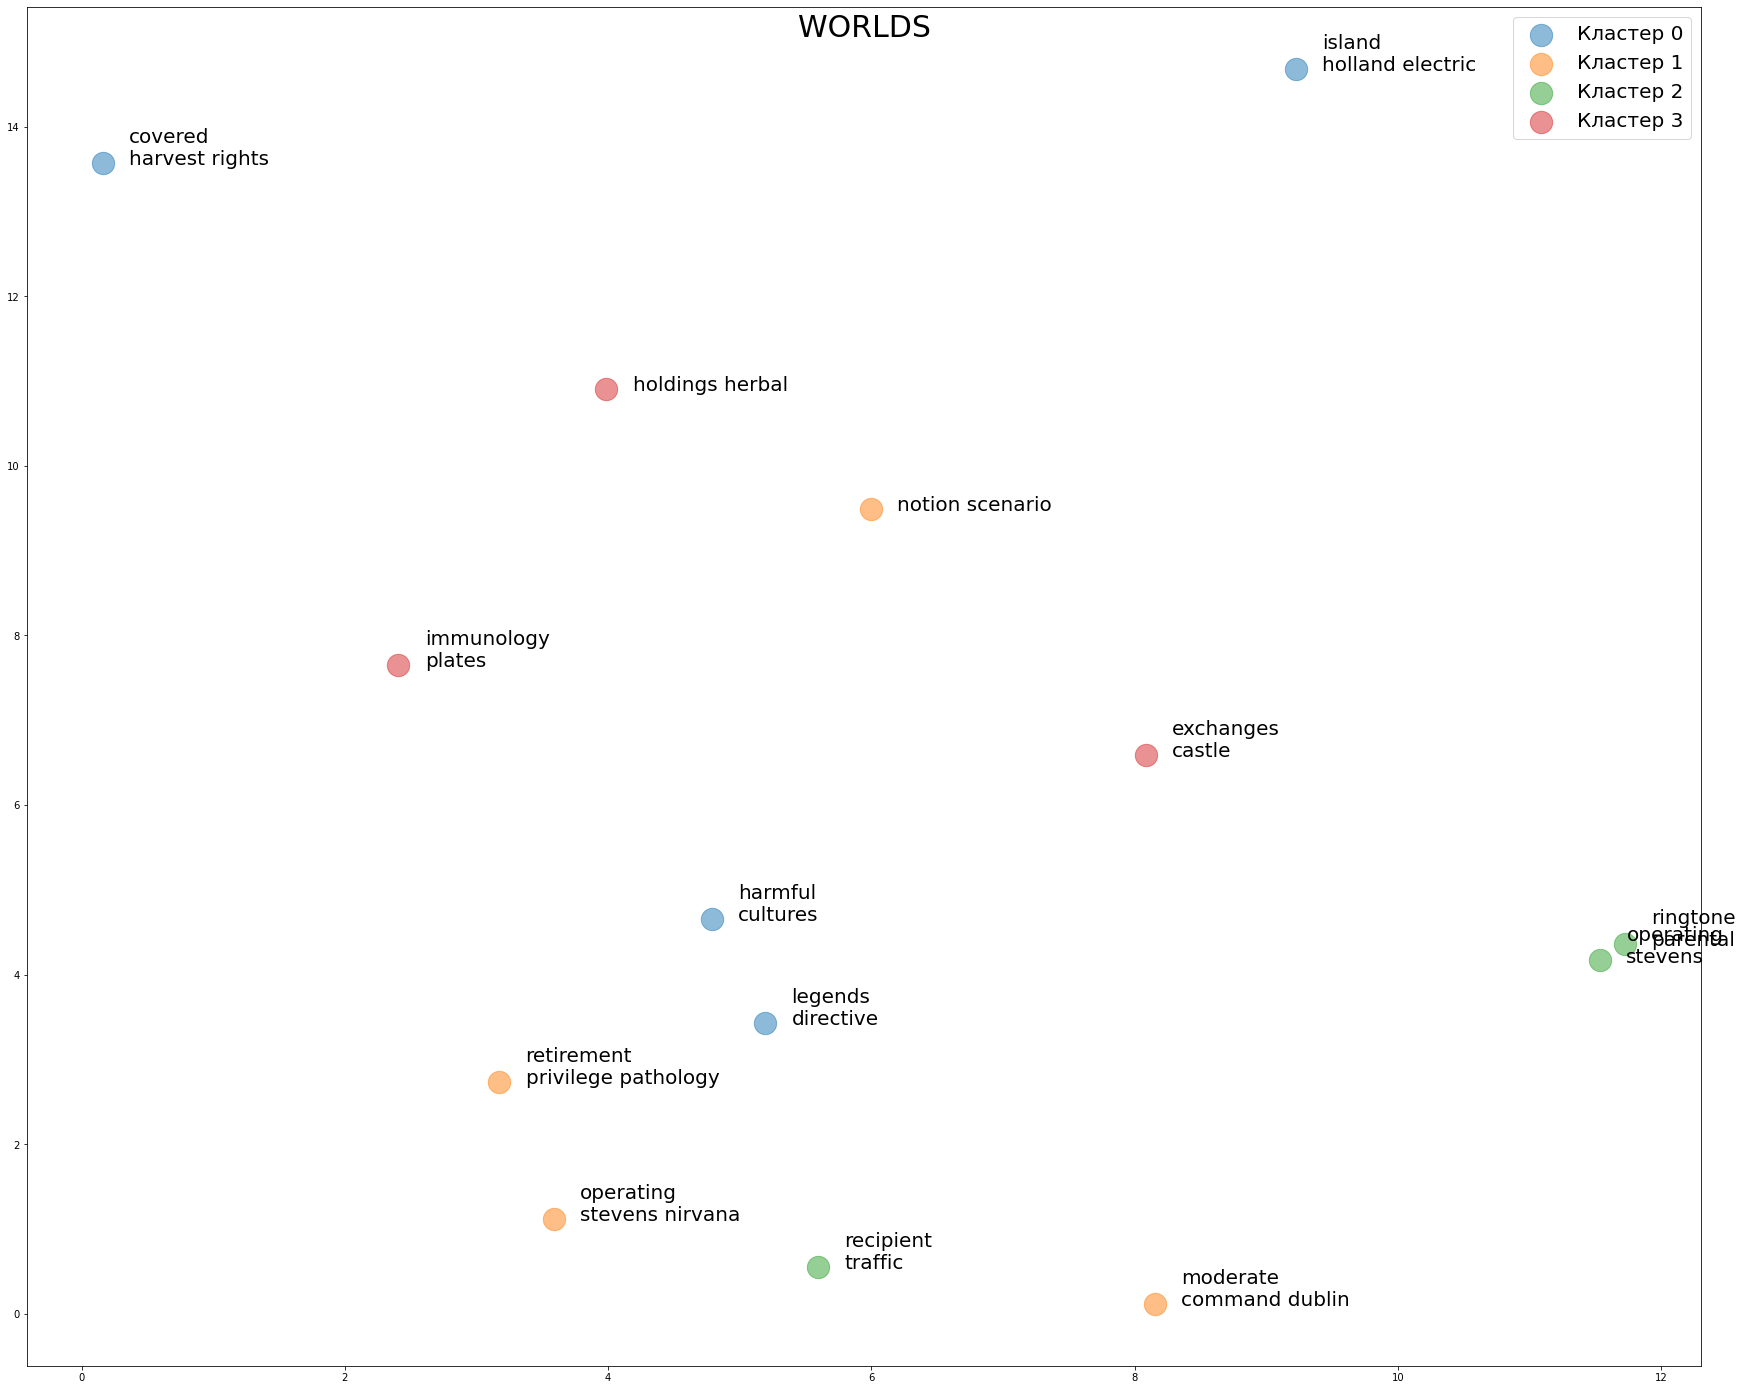

In [162]:
a=0
for area in areas:
    a+=1
    fig, ax = plt.subplots()
    fig.set_size_inches(30, 25)
    for color in colors:
        X = df[(df['area'] == area) & (df['color'] == color)]['x']
        Y = df[(df['area'] == area) & (df['color'] == color)]['y']
        keywords = df[(df['area'] == area) & (df['color'] == color)]['keyword']
        ax.scatter(X, Y, c=color, s=500, alpha=0.5, label=df[(df['area'] == area) & (df['color'] == color)]['cluster_name'].unique()[0])
        ax.legend(prop={'size': 20})
        for x, y, s in zip(X, Y, keywords):
            if len(s)>15:
                s=s.split(' ', maxsplit=1)
                s=s[0]+'\n'+s[1]
            ax.text(x+0.2, y-0.02, s, fontsize=20)
    ax.set_title(str(area).upper(), y=1.0, pad=-30, fontsize=30)
    fig.savefig(str(a) +'.png')

Изображения можно просмотреть по ссылке: https://disk.yandex.ru/d/r20cvzht9ITunQ